# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached tensorflow_gpu-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached opencv_python-4.5.5.62-cp36-abi3-win_amd64.whl (35.4 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\six.cpython-39.pyc'
Consider using the `--user` option or check the permissions.



  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

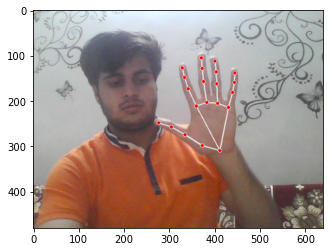

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 6.44465148e-01,  6.44029140e-01,  4.43463819e-07,  5.83813846e-01,
        6.22666359e-01, -2.30258405e-02,  5.24775386e-01,  5.72626472e-01,
       -3.78891416e-02,  4.77001399e-01,  5.37061512e-01, -5.12831546e-02,
        4.33652431e-01,  5.17181277e-01, -6.49812073e-02,  5.62807798e-01,
        4.41609800e-01, -2.19712593e-02,  5.35699725e-01,  3.61250609e-01,
       -3.82291526e-02,  5.22788703e-01,  3.10367465e-01, -5.27260303e-02,
        5.14931619e-01,  2.66410530e-01, -6.42783120e-02,  5.99471629e-01,
        4.23921198e-01, -2.58678328e-02,  5.88358641e-01,  3.27549696e-01,
       -3.84536833e-02,  5.83483458e-01,  2.68444717e-01, -5.05084544e-02,
        5.80137253e-01,  2.19890654e-01, -6.06075302e-02,  6.37025237e-01,
        4.27736670e-01, -3.32019627e-02,  6.34357333e-01,  3.37978244e-01,
       -4.77062352e-02,  6.31484807e-01,  2.83761680e-01, -5.88969067e-02,
        6.26950264e-01,  2.34933794e-01, -6.81404173e-02,  6.74535632e-01,
        4.47569907e-01, -

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')

array([ 6.44465148e-01,  6.44029140e-01,  4.43463819e-07,  5.83813846e-01,
        6.22666359e-01, -2.30258405e-02,  5.24775386e-01,  5.72626472e-01,
       -3.78891416e-02,  4.77001399e-01,  5.37061512e-01, -5.12831546e-02,
        4.33652431e-01,  5.17181277e-01, -6.49812073e-02,  5.62807798e-01,
        4.41609800e-01, -2.19712593e-02,  5.35699725e-01,  3.61250609e-01,
       -3.82291526e-02,  5.22788703e-01,  3.10367465e-01, -5.27260303e-02,
        5.14931619e-01,  2.66410530e-01, -6.42783120e-02,  5.99471629e-01,
        4.23921198e-01, -2.58678328e-02,  5.88358641e-01,  3.27549696e-01,
       -3.84536833e-02,  5.83483458e-01,  2.68444717e-01, -5.05084544e-02,
        5.80137253e-01,  2.19890654e-01, -6.06075302e-02,  6.37025237e-01,
        4.27736670e-01, -3.32019627e-02,  6.34357333e-01,  3.37978244e-01,
       -4.77062352e-02,  6.31484807e-01,  2.83761680e-01, -5.88969067e-02,
        6.26950264e-01,  2.34933794e-01, -6.81404173e-02,  6.74535632e-01,
        4.47569907e-01, -

# 4. Setup Folders for Collection

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['accident', 'ambulance', 'breathe','emergency', 'fire', 'help'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [17]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [18]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [19]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [43]:
label_map = {label:num for num, label in enumerate(actions)}

In [44]:
label_map

{'accident': 0,
 'ambulance': 1,
 'breathe': 2,
 'emergency': 3,
 'fire': 4,
 'help': 5}

In [45]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [46]:
np.array(sequences).shape

(180, 30, 126)

In [47]:
np.array(labels).shape

(180,)

In [48]:
X = np.array(sequences)

In [49]:
X.shape

(180, 30, 126)

In [50]:
y = to_categorical(labels).astype(int)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [52]:
y_test.shape

(9, 6)

# 7. Build and Train LSTM Neural Network

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [54]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [55]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [56]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [57]:
model.fit(X_train, y_train, epochs=10000, callbacks=[tb_callback])

Epoch 1/10000
6/6 [==============================] - 4s 42ms/step - loss: 1.7642 - categorical_accuracy: 0.2690
Epoch 2/10000
6/6 [==============================] - 0s 44ms/step - loss: 1.5696 - categorical_accuracy: 0.3509
Epoch 3/10000
6/6 [==============================] - 0s 45ms/step - loss: 1.3327 - categorical_accuracy: 0.4094
Epoch 4/10000
6/6 [==============================] - 0s 45ms/step - loss: 1.1390 - categorical_accuracy: 0.5380
Epoch 5/10000
6/6 [==============================] - 0s 44ms/step - loss: 1.1770 - categorical_accuracy: 0.7193
Epoch 6/10000
6/6 [==============================] - 0s 44ms/step - loss: 0.9548 - categorical_accuracy: 0.6199
Epoch 7/10000
6/6 [==============================] - 0s 45ms/step - loss: 0.5771 - categorical_accuracy: 0.8070
Epoch 8/10000
6/6 [==============================] - 0s 48ms/step - loss: 1.4586 - categorical_accuracy: 0.6374
Epoch 9/10000
6/6 [==============================] - 0s 43ms/step - loss: 1.3800 - categorical_accuracy:

6/6 [==============================] - 0s 47ms/step - loss: 0.2203 - categorical_accuracy: 0.9591
Epoch 74/10000
6/6 [==============================] - 0s 44ms/step - loss: 0.1736 - categorical_accuracy: 0.9708
Epoch 75/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.1415 - categorical_accuracy: 0.9708
Epoch 76/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.1117 - categorical_accuracy: 0.9708
Epoch 77/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0749 - categorical_accuracy: 0.9825
Epoch 78/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0748 - categorical_accuracy: 0.9708
Epoch 79/10000
6/6 [==============================] - 0s 47ms/step - loss: 6.7674 - categorical_accuracy: 0.7953
Epoch 80/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.7586 - categorical_accuracy: 0.7602
Epoch 81/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.6966 - categorical_accuracy: 0.760

6/6 [==============================] - 0s 49ms/step - loss: 1.8322 - categorical_accuracy: 0.1871
Epoch 146/10000
6/6 [==============================] - 0s 46ms/step - loss: 1.8213 - categorical_accuracy: 0.2398
Epoch 147/10000
6/6 [==============================] - 0s 46ms/step - loss: 1.8118 - categorical_accuracy: 0.2807
Epoch 148/10000
6/6 [==============================] - 0s 46ms/step - loss: 1.8039 - categorical_accuracy: 0.2456
Epoch 149/10000
6/6 [==============================] - 0s 46ms/step - loss: 1.7963 - categorical_accuracy: 0.2398
Epoch 150/10000
6/6 [==============================] - 0s 45ms/step - loss: 1.7886 - categorical_accuracy: 0.2573
Epoch 151/10000
6/6 [==============================] - 0s 45ms/step - loss: 1.7806 - categorical_accuracy: 0.2982
Epoch 152/10000
6/6 [==============================] - 0s 54ms/step - loss: 1.7680 - categorical_accuracy: 0.2164
Epoch 153/10000
6/6 [==============================] - 0s 47ms/step - loss: 1.7485 - categorical_accurac

6/6 [==============================] - 0s 55ms/step - loss: 1.2822 - categorical_accuracy: 0.3918
Epoch 218/10000
6/6 [==============================] - 0s 55ms/step - loss: 1.2570 - categorical_accuracy: 0.4620
Epoch 219/10000
6/6 [==============================] - 0s 54ms/step - loss: 1.2324 - categorical_accuracy: 0.5439
Epoch 220/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.2079 - categorical_accuracy: 0.5556
Epoch 221/10000
6/6 [==============================] - 0s 54ms/step - loss: 1.1788 - categorical_accuracy: 0.5673
Epoch 222/10000
6/6 [==============================] - 0s 52ms/step - loss: 1.1454 - categorical_accuracy: 0.5673
Epoch 223/10000
6/6 [==============================] - 0s 54ms/step - loss: 1.1011 - categorical_accuracy: 0.5673
Epoch 224/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.0395 - categorical_accuracy: 0.5906
Epoch 225/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.9314 - categorical_accurac

Epoch 289/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.2670 - categorical_accuracy: 0.9123
Epoch 290/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.2783 - categorical_accuracy: 0.9064
Epoch 291/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.2882 - categorical_accuracy: 0.9006
Epoch 292/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.3071 - categorical_accuracy: 0.9006
Epoch 293/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.3181 - categorical_accuracy: 0.8655
Epoch 294/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.4279 - categorical_accuracy: 0.8596
Epoch 295/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.6671 - categorical_accuracy: 0.8070
Epoch 296/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.3924 - categorical_accuracy: 0.9006
Epoch 297/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.3950 - cat

6/6 [==============================] - 0s 60ms/step - loss: 0.2102 - categorical_accuracy: 0.9766
Epoch 361/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.2027 - categorical_accuracy: 0.9766
Epoch 362/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.1929 - categorical_accuracy: 0.9766
Epoch 363/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.1880 - categorical_accuracy: 0.9766
Epoch 364/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.1812 - categorical_accuracy: 0.9708
Epoch 365/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.1774 - categorical_accuracy: 0.9766
Epoch 366/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.1699 - categorical_accuracy: 0.9766
Epoch 367/10000
6/6 [==============================] - 0s 61ms/step - loss: 0.1663 - categorical_accuracy: 0.9766
Epoch 368/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.1619 - categorical_accurac

Epoch 432/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0782 - categorical_accuracy: 0.9825
Epoch 433/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0780 - categorical_accuracy: 0.9825
Epoch 434/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0758 - categorical_accuracy: 0.9825
Epoch 435/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0776 - categorical_accuracy: 0.9766
Epoch 436/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0748 - categorical_accuracy: 0.9825
Epoch 437/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0773 - categorical_accuracy: 0.9825
Epoch 438/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0850 - categorical_accuracy: 0.9766
Epoch 439/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0771 - categorical_accuracy: 0.9766
Epoch 440/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0743 - cat

6/6 [==============================] - 0s 58ms/step - loss: 0.1572 - categorical_accuracy: 0.9591
Epoch 504/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.1412 - categorical_accuracy: 0.9649
Epoch 505/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.1349 - categorical_accuracy: 0.9708
Epoch 506/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.1238 - categorical_accuracy: 0.9766
Epoch 507/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.1174 - categorical_accuracy: 0.9766
Epoch 508/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.1125 - categorical_accuracy: 0.9766
Epoch 509/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.1072 - categorical_accuracy: 0.9766
Epoch 510/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.1006 - categorical_accuracy: 0.9766
Epoch 511/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.1000 - categorical_accurac

6/6 [==============================] - 0s 57ms/step - loss: 0.1233 - categorical_accuracy: 0.9649
Epoch 576/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.1155 - categorical_accuracy: 0.9649
Epoch 577/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.1027 - categorical_accuracy: 0.9649
Epoch 578/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.1041 - categorical_accuracy: 0.9649
Epoch 579/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0964 - categorical_accuracy: 0.9708
Epoch 580/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.0898 - categorical_accuracy: 0.9708
Epoch 581/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0882 - categorical_accuracy: 0.9708
Epoch 582/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0843 - categorical_accuracy: 0.9708
Epoch 583/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0852 - categorical_accurac

6/6 [==============================] - 0s 59ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 648/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 649/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 650/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 651/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 652/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 653/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 654/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 655/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0014 - categorical_accurac

6/6 [==============================] - 0s 56ms/step - loss: 0.0537 - categorical_accuracy: 0.9883
Epoch 718/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0523 - categorical_accuracy: 0.9883
Epoch 719/10000
6/6 [==============================] - 0s 61ms/step - loss: 0.0487 - categorical_accuracy: 0.9883
Epoch 720/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0458 - categorical_accuracy: 0.9883
Epoch 721/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0436 - categorical_accuracy: 0.9883
Epoch 722/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0397 - categorical_accuracy: 0.9883
Epoch 723/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0408 - categorical_accuracy: 0.9883
Epoch 724/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0358 - categorical_accuracy: 0.9883
Epoch 725/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0418 - categorical_accurac

6/6 [==============================] - 0s 57ms/step - loss: 6.9606e-04 - categorical_accuracy: 1.0000
Epoch 789/10000
6/6 [==============================] - 0s 56ms/step - loss: 6.2457e-04 - categorical_accuracy: 1.0000
Epoch 790/10000
6/6 [==============================] - 0s 57ms/step - loss: 6.0628e-04 - categorical_accuracy: 1.0000
Epoch 791/10000
6/6 [==============================] - 0s 55ms/step - loss: 5.5935e-04 - categorical_accuracy: 1.0000
Epoch 792/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.2949e-04 - categorical_accuracy: 1.0000
Epoch 793/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.9294e-04 - categorical_accuracy: 1.0000
Epoch 794/10000
6/6 [==============================] - 0s 56ms/step - loss: 4.6146e-04 - categorical_accuracy: 1.0000
Epoch 795/10000
6/6 [==============================] - 0s 56ms/step - loss: 4.4316e-04 - categorical_accuracy: 1.0000
Epoch 796/10000
6/6 [==============================] - 0s 56ms/step - lo

6/6 [==============================] - 0s 56ms/step - loss: 9.9448e-06 - categorical_accuracy: 1.0000
Epoch 858/10000
6/6 [==============================] - 0s 57ms/step - loss: 9.5449e-06 - categorical_accuracy: 1.0000
Epoch 859/10000
6/6 [==============================] - 0s 56ms/step - loss: 9.3101e-06 - categorical_accuracy: 1.0000
Epoch 860/10000
6/6 [==============================] - 0s 56ms/step - loss: 8.8421e-06 - categorical_accuracy: 1.0000
Epoch 861/10000
6/6 [==============================] - 0s 56ms/step - loss: 8.4529e-06 - categorical_accuracy: 1.0000
Epoch 862/10000
6/6 [==============================] - 0s 56ms/step - loss: 8.1145e-06 - categorical_accuracy: 1.0000
Epoch 863/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.6373e-06 - categorical_accuracy: 1.0000
Epoch 864/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.3719e-06 - categorical_accuracy: 1.0000
Epoch 865/10000
6/6 [==============================] - 0s 56ms/step - lo

6/6 [==============================] - 0s 55ms/step - loss: 8.5675e-07 - categorical_accuracy: 1.0000
Epoch 927/10000
6/6 [==============================] - 0s 55ms/step - loss: 8.3862e-07 - categorical_accuracy: 1.0000
Epoch 928/10000
6/6 [==============================] - 0s 56ms/step - loss: 8.1562e-07 - categorical_accuracy: 1.0000
Epoch 929/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.9471e-07 - categorical_accuracy: 1.0000
Epoch 930/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.8076e-07 - categorical_accuracy: 1.0000
Epoch 931/10000
6/6 [==============================] - 0s 56ms/step - loss: 7.5706e-07 - categorical_accuracy: 1.0000
Epoch 932/10000
6/6 [==============================] - 0s 56ms/step - loss: 7.3894e-07 - categorical_accuracy: 1.0000
Epoch 933/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.1524e-07 - categorical_accuracy: 1.0000
Epoch 934/10000
6/6 [==============================] - 0s 57ms/step - lo

6/6 [==============================] - 0s 57ms/step - loss: 1.7986e-07 - categorical_accuracy: 1.0000
Epoch 996/10000
6/6 [==============================] - 0s 55ms/step - loss: 1.7637e-07 - categorical_accuracy: 1.0000
Epoch 997/10000
6/6 [==============================] - 0s 55ms/step - loss: 1.7358e-07 - categorical_accuracy: 1.0000
Epoch 998/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.6940e-07 - categorical_accuracy: 1.0000
Epoch 999/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.6661e-07 - categorical_accuracy: 1.0000
Epoch 1000/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.6313e-07 - categorical_accuracy: 1.0000
Epoch 1001/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.6173e-07 - categorical_accuracy: 1.0000
Epoch 1002/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.5825e-07 - categorical_accuracy: 1.0000
Epoch 1003/10000
6/6 [==============================] - 0s 55ms/step 

6/6 [==============================] - 0s 57ms/step - loss: 6.5530e-08 - categorical_accuracy: 1.0000
Epoch 1065/10000
6/6 [==============================] - 0s 58ms/step - loss: 6.5530e-08 - categorical_accuracy: 1.0000
Epoch 1066/10000
6/6 [==============================] - 0s 57ms/step - loss: 6.4833e-08 - categorical_accuracy: 1.0000
Epoch 1067/10000
6/6 [==============================] - 0s 56ms/step - loss: 6.4136e-08 - categorical_accuracy: 1.0000
Epoch 1068/10000
6/6 [==============================] - 0s 60ms/step - loss: 6.2742e-08 - categorical_accuracy: 1.0000
Epoch 1069/10000
6/6 [==============================] - 0s 57ms/step - loss: 6.2742e-08 - categorical_accuracy: 1.0000
Epoch 1070/10000
6/6 [==============================] - 0s 62ms/step - loss: 6.2045e-08 - categorical_accuracy: 1.0000
Epoch 1071/10000
6/6 [==============================] - 0s 62ms/step - loss: 6.2742e-08 - categorical_accuracy: 1.0000
Epoch 1072/10000
6/6 [==============================] - 0s 63ms/s

Epoch 1133/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.2068e-08 - categorical_accuracy: 1.0000
Epoch 1134/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.2068e-08 - categorical_accuracy: 1.0000
Epoch 1135/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.1371e-08 - categorical_accuracy: 1.0000
Epoch 1136/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.1371e-08 - categorical_accuracy: 1.0000
Epoch 1137/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.2068e-08 - categorical_accuracy: 1.0000
Epoch 1138/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.9977e-08 - categorical_accuracy: 1.0000
Epoch 1139/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.0674e-08 - categorical_accuracy: 1.0000
Epoch 1140/10000
6/6 [==============================] - 0s 55ms/step - loss: 2.9279e-08 - categorical_accuracy: 1.0000
Epoch 1141/10000
6/6 [==========================

6/6 [==============================] - 0s 56ms/step - loss: 2.1611e-08 - categorical_accuracy: 1.0000
Epoch 1202/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.1611e-08 - categorical_accuracy: 1.0000
Epoch 1203/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.1611e-08 - categorical_accuracy: 1.0000
Epoch 1204/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.0914e-08 - categorical_accuracy: 1.0000
Epoch 1205/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0217e-08 - categorical_accuracy: 1.0000
Epoch 1206/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.9520e-08 - categorical_accuracy: 1.0000
Epoch 1207/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.9520e-08 - categorical_accuracy: 1.0000
Epoch 1208/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 1209/10000
6/6 [==============================] - 0s 56ms/s

Epoch 1270/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.1154e-08 - categorical_accuracy: 1.0000
Epoch 1271/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.1851e-08 - categorical_accuracy: 1.0000
Epoch 1272/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.1154e-08 - categorical_accuracy: 1.0000
Epoch 1273/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1274/10000
6/6 [==============================] - 0s 55ms/step - loss: 1.1154e-08 - categorical_accuracy: 1.0000
Epoch 1275/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.0457e-08 - categorical_accuracy: 1.0000
Epoch 1276/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.1154e-08 - categorical_accuracy: 1.0000
Epoch 1277/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.1154e-08 - categorical_accuracy: 1.0000
Epoch 1278/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1339/10000
6/6 [==============================] - 0s 56ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1340/10000
6/6 [==============================] - 0s 57ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1341/10000
6/6 [==============================] - 0s 57ms/step - loss: 9.0627e-09 - categorical_accuracy: 1.0000
Epoch 1342/10000
6/6 [==============================] - 0s 57ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1343/10000
6/6 [==============================] - 0s 56ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1344/10000
6/6 [==============================] - 0s 57ms/step - loss: 9.0627e-09 - categorical_accuracy: 1.0000
Epoch 1345/10000
6/6 [==============================] - 0s 56ms/step - loss: 8.3656e-09 - categorical_accuracy: 1.0000
Epoch 1346/10000
6/6 [==============================] - 0s 57ms/s

Epoch 1407/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.5770e-09 - categorical_accuracy: 1.0000
Epoch 1408/10000
6/6 [==============================] - 0s 55ms/step - loss: 5.5770e-09 - categorical_accuracy: 1.0000
Epoch 1409/10000
6/6 [==============================] - 0s 56ms/step - loss: 5.5770e-09 - categorical_accuracy: 1.0000
Epoch 1410/10000
6/6 [==============================] - 0s 56ms/step - loss: 5.5770e-09 - categorical_accuracy: 1.0000
Epoch 1411/10000
6/6 [==============================] - 0s 57ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1412/10000
6/6 [==============================] - 0s 57ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1413/10000
6/6 [==============================] - 0s 63ms/step - loss: 5.5770e-09 - categorical_accuracy: 1.0000
Epoch 1414/10000
6/6 [==============================] - 0s 62ms/step - loss: 5.5770e-09 - categorical_accuracy: 1.0000
Epoch 1415/10000
6/6 [==========================

6/6 [==============================] - 0s 59ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 1476/10000
6/6 [==============================] - 0s 59ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 1477/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 1478/10000
6/6 [==============================] - 0s 58ms/step - loss: 4.8799e-09 - categorical_accuracy: 1.0000
Epoch 1479/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1480/10000
6/6 [==============================] - 0s 58ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1481/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 1482/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 1483/10000
6/6 [==============================] - 0s 57ms/s

Epoch 1544/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1545/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1546/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1547/10000
6/6 [==============================] - 0s 55ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 1548/10000
6/6 [==============================] - 0s 55ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 1549/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1550/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1551/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 1552/10000
6/6 [==========================

6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1613/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1614/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1615/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1616/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1617/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1618/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 1619/10000
6/6 [==============================] - 0s 55ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1620/10000
6/6 [==============================] - 0s 56ms/s

Epoch 1681/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1682/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1683/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1684/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1685/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1686/10000
6/6 [==============================] - 0s 55ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1687/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1688/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1689/10000
6/6 [==========================

6/6 [==============================] - 0s 55ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1750/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1751/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1752/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1753/10000
6/6 [==============================] - 0s 60ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1754/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1755/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1756/10000
6/6 [==============================] - 0s 65ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1757/10000
6/6 [==============================] - 0s 63ms/s

Epoch 1818/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 1819/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1820/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1821/10000
6/6 [==============================] - 0s 54ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1822/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1823/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1824/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1825/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1826/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1887/10000
6/6 [==============================] - 0s 61ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1888/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1889/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1890/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1891/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1892/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1893/10000
6/6 [==============================] - 0s 55ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 1894/10000
6/6 [==============================] - 0s 56ms/s

Epoch 1955/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1956/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1957/10000
6/6 [==============================] - 0s 55ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1958/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1959/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1960/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 1961/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1962/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 1963/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2024/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 2025/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 2026/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 2027/10000
6/6 [==============================] - 0s 55ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 2028/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2029/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2030/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2031/10000
6/6 [==============================] - 0s 56ms/s

Epoch 2092/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2093/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2094/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 2095/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 2096/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2097/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2098/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2099/10000
6/6 [==============================] - 0s 62ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2100/10000
6/6 [==========================

6/6 [==============================] - 0s 59ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2161/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2162/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2163/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2164/10000
6/6 [==============================] - 0s 55ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2165/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2166/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2167/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2168/10000
6/6 [==============================] - 0s 56ms/s

Epoch 2229/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2230/10000
6/6 [==============================] - 0s 60ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2231/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2232/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2233/10000
6/6 [==============================] - 0s 55ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2234/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2235/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2236/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2237/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2298/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2299/10000
6/6 [==============================] - 0s 55ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2300/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2301/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2302/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2303/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2304/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2305/10000
6/6 [==============================] - 0s 57ms/s

Epoch 2366/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2367/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2368/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2369/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2370/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2371/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2372/10000
6/6 [==============================] - 0s 67ms/step - loss: 4.1828e-09 - categorical_accuracy: 1.0000
Epoch 2373/10000
6/6 [==============================] - 0s 69ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 2374/10000
6/6 [==========================

6/6 [==============================] - 0s 58ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2435/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2436/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3943e-09 - categorical_accuracy: 1.0000
Epoch 2437/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0914e-09 - categorical_accuracy: 1.0000
Epoch 2438/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2439/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2440/10000
6/6 [==============================] - 0s 62ms/step - loss: 2.7885e-09 - categorical_accuracy: 1.0000
Epoch 2441/10000
6/6 [==============================] - 0s 65ms/step - loss: 3.4857e-09 - categorical_accuracy: 1.0000
Epoch 2442/10000
6/6 [==============================] - 0s 65ms/s

6/6 [==============================] - 0s 57ms/step - loss: 0.3444 - categorical_accuracy: 0.8772
Epoch 2504/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.3048 - categorical_accuracy: 0.9123
Epoch 2505/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.0508 - categorical_accuracy: 0.8304
Epoch 2506/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.4423 - categorical_accuracy: 0.7953
Epoch 2507/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.3650 - categorical_accuracy: 0.8596
Epoch 2508/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.3142 - categorical_accuracy: 0.9064
Epoch 2509/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.2675 - categorical_accuracy: 0.9474
Epoch 2510/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.1699 - categorical_accuracy: 0.9532
Epoch 2511/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.1993 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 0.0258 - categorical_accuracy: 0.9942
Epoch 2575/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0273 - categorical_accuracy: 0.9883
Epoch 2576/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0245 - categorical_accuracy: 0.9942
Epoch 2577/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0213 - categorical_accuracy: 0.9942
Epoch 2578/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0185 - categorical_accuracy: 1.0000
Epoch 2579/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0178 - categorical_accuracy: 1.0000
Epoch 2580/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0156 - categorical_accuracy: 0.9942
Epoch 2581/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0198 - categorical_accuracy: 0.9942
Epoch 2582/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0424 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0783 - categorical_accuracy: 0.9825
Epoch 2646/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0752 - categorical_accuracy: 0.9825
Epoch 2647/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0711 - categorical_accuracy: 0.9825
Epoch 2648/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0674 - categorical_accuracy: 0.9825
Epoch 2649/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0657 - categorical_accuracy: 0.9825
Epoch 2650/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0627 - categorical_accuracy: 0.9825
Epoch 2651/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0603 - categorical_accuracy: 0.9825
Epoch 2652/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0568 - categorical_accuracy: 0.9825
Epoch 2653/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0556 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.0791 - categorical_accuracy: 0.9766
Epoch 2717/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0785 - categorical_accuracy: 0.9766
Epoch 2718/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0750 - categorical_accuracy: 0.9766
Epoch 2719/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0748 - categorical_accuracy: 0.9766
Epoch 2720/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0716 - categorical_accuracy: 0.9766
Epoch 2721/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0715 - categorical_accuracy: 0.9766
Epoch 2722/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0727 - categorical_accuracy: 0.9766
Epoch 2723/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0703 - categorical_accuracy: 0.9766
Epoch 2724/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0732 - categorical

6/6 [==============================] - 0s 74ms/step - loss: 0.1428 - categorical_accuracy: 0.9708
Epoch 2788/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.1328 - categorical_accuracy: 0.9649
Epoch 2789/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.1278 - categorical_accuracy: 0.9591
Epoch 2790/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.1222 - categorical_accuracy: 0.9591
Epoch 2791/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.1193 - categorical_accuracy: 0.9591
Epoch 2792/10000
6/6 [==============================] - 0s 65ms/step - loss: 0.1146 - categorical_accuracy: 0.9708
Epoch 2793/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.1105 - categorical_accuracy: 0.9708
Epoch 2794/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.1132 - categorical_accuracy: 0.9708
Epoch 2795/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.1068 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.0399 - categorical_accuracy: 0.9883
Epoch 2859/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0380 - categorical_accuracy: 0.9942
Epoch 2860/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0404 - categorical_accuracy: 0.9883
Epoch 2861/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0443 - categorical_accuracy: 0.9825
Epoch 2862/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0623 - categorical_accuracy: 0.9766
Epoch 2863/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0419 - categorical_accuracy: 0.9942
Epoch 2864/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0349 - categorical_accuracy: 0.9883
Epoch 2865/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0538 - categorical_accuracy: 0.9649
Epoch 2866/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0458 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0174 - categorical_accuracy: 0.9942
Epoch 2930/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0165 - categorical_accuracy: 0.9942
Epoch 2931/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0167 - categorical_accuracy: 0.9942
Epoch 2932/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0149 - categorical_accuracy: 0.9883
Epoch 2933/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0131 - categorical_accuracy: 0.9942
Epoch 2934/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0137 - categorical_accuracy: 0.9883
Epoch 2935/10000
6/6 [==============================] - 0s 61ms/step - loss: 0.0130 - categorical_accuracy: 0.9942
Epoch 2936/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0137 - categorical_accuracy: 0.9942
Epoch 2937/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0243 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0197 - categorical_accuracy: 0.9942
Epoch 3001/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0183 - categorical_accuracy: 0.9942
Epoch 3002/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0173 - categorical_accuracy: 0.9942
Epoch 3003/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0157 - categorical_accuracy: 0.9942
Epoch 3004/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0193 - categorical_accuracy: 0.9942
Epoch 3005/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0148 - categorical_accuracy: 0.9942
Epoch 3006/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0146 - categorical_accuracy: 0.9942
Epoch 3007/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0192 - categorical_accuracy: 0.9942
Epoch 3008/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0368 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.0910 - categorical_accuracy: 0.9649
Epoch 3072/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0707 - categorical_accuracy: 0.9825
Epoch 3073/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0702 - categorical_accuracy: 0.9766
Epoch 3074/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0569 - categorical_accuracy: 0.9825
Epoch 3075/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0578 - categorical_accuracy: 0.9766
Epoch 3076/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0525 - categorical_accuracy: 0.9825
Epoch 3077/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0531 - categorical_accuracy: 0.9825
Epoch 3078/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0538 - categorical_accuracy: 0.9825
Epoch 3079/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0468 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.5002 - categorical_accuracy: 0.8187
Epoch 3143/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.5069 - categorical_accuracy: 0.8304
Epoch 3144/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.4941 - categorical_accuracy: 0.8187
Epoch 3145/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.4930 - categorical_accuracy: 0.8129
Epoch 3146/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.4815 - categorical_accuracy: 0.8363
Epoch 3147/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.4795 - categorical_accuracy: 0.8304
Epoch 3148/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.4726 - categorical_accuracy: 0.8538
Epoch 3149/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.4620 - categorical_accuracy: 0.8538
Epoch 3150/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.4579 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0963 - categorical_accuracy: 0.9591
Epoch 3214/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0929 - categorical_accuracy: 0.9591
Epoch 3215/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0931 - categorical_accuracy: 0.9591
Epoch 3216/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0873 - categorical_accuracy: 0.9649
Epoch 3217/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0851 - categorical_accuracy: 0.9591
Epoch 3218/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0823 - categorical_accuracy: 0.9649
Epoch 3219/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0886 - categorical_accuracy: 0.9532
Epoch 3220/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0798 - categorical_accuracy: 0.9649
Epoch 3221/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0763 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0222 - categorical_accuracy: 0.9883
Epoch 3285/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0193 - categorical_accuracy: 0.9942
Epoch 3286/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0187 - categorical_accuracy: 0.9883
Epoch 3287/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0194 - categorical_accuracy: 0.9883
Epoch 3288/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0206 - categorical_accuracy: 0.9883
Epoch 3289/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0202 - categorical_accuracy: 0.9942
Epoch 3290/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0198 - categorical_accuracy: 0.9883
Epoch 3291/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0174 - categorical_accuracy: 0.9942
Epoch 3292/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0197 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.0201 - categorical_accuracy: 0.9942
Epoch 3356/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0172 - categorical_accuracy: 0.9942
Epoch 3357/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0164 - categorical_accuracy: 0.9942
Epoch 3358/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0170 - categorical_accuracy: 0.9883
Epoch 3359/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0165 - categorical_accuracy: 0.9942
Epoch 3360/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0181 - categorical_accuracy: 1.0000
Epoch 3361/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0163 - categorical_accuracy: 1.0000
Epoch 3362/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0148 - categorical_accuracy: 1.0000
Epoch 3363/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0153 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 3427/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0132 - categorical_accuracy: 0.9942
Epoch 3428/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0127 - categorical_accuracy: 0.9942
Epoch 3429/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 3430/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 3431/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 3432/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0056 - categorical_accuracy: 1.0000
Epoch 3433/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 3434/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0057 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 3498/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 3499/10000
6/6 [==============================] - 0s 59ms/step - loss: 8.4934e-04 - categorical_accuracy: 1.0000
Epoch 3500/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 3501/10000
6/6 [==============================] - 0s 56ms/step - loss: 7.9599e-04 - categorical_accuracy: 1.0000
Epoch 3502/10000
6/6 [==============================] - 0s 56ms/step - loss: 9.8546e-04 - categorical_accuracy: 1.0000
Epoch 3503/10000
6/6 [==============================] - 0s 56ms/step - loss: 8.2490e-04 - categorical_accuracy: 1.0000
Epoch 3504/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.4053e-04 - categorical_accuracy: 1.0000
Epoch 3505/10000
6/6 [==============================] - 0s 56ms/step - loss: 

6/6 [==============================] - 0s 56ms/step - loss: 1.5030e-04 - categorical_accuracy: 1.0000
Epoch 3567/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.5041e-04 - categorical_accuracy: 1.0000
Epoch 3568/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.4704e-04 - categorical_accuracy: 1.0000
Epoch 3569/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.4557e-04 - categorical_accuracy: 1.0000
Epoch 3570/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.4122e-04 - categorical_accuracy: 1.0000
Epoch 3571/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.4015e-04 - categorical_accuracy: 1.0000
Epoch 3572/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3558e-04 - categorical_accuracy: 1.0000
Epoch 3573/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3297e-04 - categorical_accuracy: 1.0000
Epoch 3574/10000
6/6 [==============================] - 0s 56ms/s

Epoch 3635/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.0636e-05 - categorical_accuracy: 1.0000
Epoch 3636/10000
6/6 [==============================] - 0s 59ms/step - loss: 4.8931e-05 - categorical_accuracy: 1.0000
Epoch 3637/10000
6/6 [==============================] - 0s 56ms/step - loss: 4.8811e-05 - categorical_accuracy: 1.0000
Epoch 3638/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.7835e-05 - categorical_accuracy: 1.0000
Epoch 3639/10000
6/6 [==============================] - 0s 55ms/step - loss: 4.7378e-05 - categorical_accuracy: 1.0000
Epoch 3640/10000
6/6 [==============================] - 0s 56ms/step - loss: 4.7020e-05 - categorical_accuracy: 1.0000
Epoch 3641/10000
6/6 [==============================] - 0s 56ms/step - loss: 4.5823e-05 - categorical_accuracy: 1.0000
Epoch 3642/10000
6/6 [==============================] - 0s 58ms/step - loss: 4.5148e-05 - categorical_accuracy: 1.0000
Epoch 3643/10000
6/6 [==========================

6/6 [==============================] - 0s 56ms/step - loss: 2.1624e-05 - categorical_accuracy: 1.0000
Epoch 3704/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.1587e-05 - categorical_accuracy: 1.0000
Epoch 3705/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.1326e-05 - categorical_accuracy: 1.0000
Epoch 3706/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.0798e-05 - categorical_accuracy: 1.0000
Epoch 3707/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.0728e-05 - categorical_accuracy: 1.0000
Epoch 3708/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0829e-05 - categorical_accuracy: 1.0000
Epoch 3709/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0369e-05 - categorical_accuracy: 1.0000
Epoch 3710/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.0324e-05 - categorical_accuracy: 1.0000
Epoch 3711/10000
6/6 [==============================] - 0s 56ms/s

Epoch 3772/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.1498e-05 - categorical_accuracy: 1.0000
Epoch 3773/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.1326e-05 - categorical_accuracy: 1.0000
Epoch 3774/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.1418e-05 - categorical_accuracy: 1.0000
Epoch 3775/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.1333e-05 - categorical_accuracy: 1.0000
Epoch 3776/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.1135e-05 - categorical_accuracy: 1.0000
Epoch 3777/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.1003e-05 - categorical_accuracy: 1.0000
Epoch 3778/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.1012e-05 - categorical_accuracy: 1.0000
Epoch 3779/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.1032e-05 - categorical_accuracy: 1.0000
Epoch 3780/10000
6/6 [==========================

6/6 [==============================] - 0s 56ms/step - loss: 0.0544 - categorical_accuracy: 0.9825
Epoch 3843/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0562 - categorical_accuracy: 0.9825
Epoch 3844/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0533 - categorical_accuracy: 0.9825
Epoch 3845/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0531 - categorical_accuracy: 0.9825
Epoch 3846/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0558 - categorical_accuracy: 0.9825
Epoch 3847/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0522 - categorical_accuracy: 0.9883
Epoch 3848/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0492 - categorical_accuracy: 0.9883
Epoch 3849/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0515 - categorical_accuracy: 0.9883
Epoch 3850/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0497 - categorical

6/6 [==============================] - 0s 65ms/step - loss: 0.4881 - categorical_accuracy: 0.8129
Epoch 3914/10000
6/6 [==============================] - 0s 71ms/step - loss: 0.4238 - categorical_accuracy: 0.8480
Epoch 3915/10000
6/6 [==============================] - 0s 68ms/step - loss: 0.3990 - categorical_accuracy: 0.8596
Epoch 3916/10000
6/6 [==============================] - 0s 69ms/step - loss: 0.3419 - categorical_accuracy: 0.8889
Epoch 3917/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.3193 - categorical_accuracy: 0.9357
Epoch 3918/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.2829 - categorical_accuracy: 0.9415
Epoch 3919/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.2552 - categorical_accuracy: 0.9649
Epoch 3920/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.2926 - categorical_accuracy: 0.9357
Epoch 3921/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.2340 - categorical

6/6 [==============================] - 0s 63ms/step - loss: 0.1261 - categorical_accuracy: 0.9591
Epoch 3985/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.1281 - categorical_accuracy: 0.9649
Epoch 3986/10000
6/6 [==============================] - 0s 71ms/step - loss: 0.0899 - categorical_accuracy: 0.9766
Epoch 3987/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.1173 - categorical_accuracy: 0.9649
Epoch 3988/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.1042 - categorical_accuracy: 0.9649
Epoch 3989/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0923 - categorical_accuracy: 0.9825
Epoch 3990/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0878 - categorical_accuracy: 0.9825
Epoch 3991/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0819 - categorical_accuracy: 0.9766
Epoch 3992/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0865 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.0363 - categorical_accuracy: 0.9942
Epoch 4056/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0398 - categorical_accuracy: 0.9883
Epoch 4057/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0387 - categorical_accuracy: 0.9942
Epoch 4058/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0356 - categorical_accuracy: 0.9942
Epoch 4059/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0353 - categorical_accuracy: 0.9942
Epoch 4060/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0345 - categorical_accuracy: 0.9942
Epoch 4061/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0332 - categorical_accuracy: 0.9942
Epoch 4062/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0327 - categorical_accuracy: 0.9942
Epoch 4063/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0321 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.3906 - categorical_accuracy: 0.8538
Epoch 4127/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.4035 - categorical_accuracy: 0.8363
Epoch 4128/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.3556 - categorical_accuracy: 0.8421
Epoch 4129/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.3339 - categorical_accuracy: 0.8772
Epoch 4130/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.4189 - categorical_accuracy: 0.7953
Epoch 4131/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.3253 - categorical_accuracy: 0.8538
Epoch 4132/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.3635 - categorical_accuracy: 0.8304
Epoch 4133/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.3365 - categorical_accuracy: 0.8304
Epoch 4134/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.3432 - categorical

6/6 [==============================] - 0s 59ms/step - loss: 0.0955 - categorical_accuracy: 0.9649
Epoch 4198/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0904 - categorical_accuracy: 0.9649
Epoch 4199/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0869 - categorical_accuracy: 0.9708
Epoch 4200/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0918 - categorical_accuracy: 0.9708
Epoch 4201/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0923 - categorical_accuracy: 0.9649
Epoch 4202/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0849 - categorical_accuracy: 0.9708
Epoch 4203/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0833 - categorical_accuracy: 0.9766
Epoch 4204/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0840 - categorical_accuracy: 0.9766
Epoch 4205/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0836 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.0668 - categorical_accuracy: 0.9766
Epoch 4269/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0654 - categorical_accuracy: 0.9766
Epoch 4270/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0642 - categorical_accuracy: 0.9766
Epoch 4271/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0657 - categorical_accuracy: 0.9766
Epoch 4272/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.1018 - categorical_accuracy: 0.9649
Epoch 4273/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.1181 - categorical_accuracy: 0.9591
Epoch 4274/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0983 - categorical_accuracy: 0.9708
Epoch 4275/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.1832 - categorical_accuracy: 0.9532
Epoch 4276/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.1134 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 0.0671 - categorical_accuracy: 0.9825
Epoch 4340/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0674 - categorical_accuracy: 0.9825
Epoch 4341/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0640 - categorical_accuracy: 0.9825
Epoch 4342/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0630 - categorical_accuracy: 0.9825
Epoch 4343/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0630 - categorical_accuracy: 0.9825
Epoch 4344/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0627 - categorical_accuracy: 0.9825
Epoch 4345/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0629 - categorical_accuracy: 0.9825
Epoch 4346/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0613 - categorical_accuracy: 0.9825
Epoch 4347/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0613 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0414 - categorical_accuracy: 0.9883
Epoch 4411/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0403 - categorical_accuracy: 0.9883
Epoch 4412/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0391 - categorical_accuracy: 0.9883
Epoch 4413/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0392 - categorical_accuracy: 0.9883
Epoch 4414/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0389 - categorical_accuracy: 0.9883
Epoch 4415/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0388 - categorical_accuracy: 0.9883
Epoch 4416/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0377 - categorical_accuracy: 0.9883
Epoch 4417/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0387 - categorical_accuracy: 0.9883
Epoch 4418/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0372 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 0.0419 - categorical_accuracy: 0.9883
Epoch 4482/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0416 - categorical_accuracy: 0.9883
Epoch 4483/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0408 - categorical_accuracy: 0.9883
Epoch 4484/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0403 - categorical_accuracy: 0.9883
Epoch 4485/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0398 - categorical_accuracy: 0.9883
Epoch 4486/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0391 - categorical_accuracy: 0.9883
Epoch 4487/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0406 - categorical_accuracy: 0.9883
Epoch 4488/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0399 - categorical_accuracy: 0.9883
Epoch 4489/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0395 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.1065 - categorical_accuracy: 0.9825
Epoch 4553/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.1103 - categorical_accuracy: 0.9708
Epoch 4554/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.1071 - categorical_accuracy: 0.9708
Epoch 4555/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0927 - categorical_accuracy: 0.9825
Epoch 4556/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0914 - categorical_accuracy: 0.9825
Epoch 4557/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0918 - categorical_accuracy: 0.9825
Epoch 4558/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0877 - categorical_accuracy: 0.9825
Epoch 4559/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0857 - categorical_accuracy: 0.9825
Epoch 4560/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0811 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0466 - categorical_accuracy: 0.9883
Epoch 4624/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0460 - categorical_accuracy: 0.9883
Epoch 4625/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0458 - categorical_accuracy: 0.9883
Epoch 4626/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0471 - categorical_accuracy: 0.9883
Epoch 4627/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0456 - categorical_accuracy: 0.9883
Epoch 4628/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0458 - categorical_accuracy: 0.9883
Epoch 4629/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0451 - categorical_accuracy: 0.9883
Epoch 4630/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0438 - categorical_accuracy: 0.9883
Epoch 4631/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0436 - categorical

6/6 [==============================] - 0s 63ms/step - loss: 0.0330 - categorical_accuracy: 0.9883
Epoch 4695/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0327 - categorical_accuracy: 0.9883
Epoch 4696/10000
6/6 [==============================] - 0s 69ms/step - loss: 0.0322 - categorical_accuracy: 0.9883
Epoch 4697/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0324 - categorical_accuracy: 0.9883
Epoch 4698/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0314 - categorical_accuracy: 0.9883
Epoch 4699/10000
6/6 [==============================] - 0s 65ms/step - loss: 0.0306 - categorical_accuracy: 0.9883
Epoch 4700/10000
6/6 [==============================] - 0s 70ms/step - loss: 0.0319 - categorical_accuracy: 0.9883
Epoch 4701/10000
6/6 [==============================] - 0s 69ms/step - loss: 0.0295 - categorical_accuracy: 0.9883
Epoch 4702/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.0318 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.0290 - categorical_accuracy: 0.9883
Epoch 4766/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0302 - categorical_accuracy: 0.9883
Epoch 4767/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0300 - categorical_accuracy: 0.9883
Epoch 4768/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0283 - categorical_accuracy: 0.9883
Epoch 4769/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0286 - categorical_accuracy: 0.9883
Epoch 4770/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0314 - categorical_accuracy: 0.9883
Epoch 4771/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0293 - categorical_accuracy: 0.9942
Epoch 4772/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0321 - categorical_accuracy: 0.9825
Epoch 4773/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0299 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 4837/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0079 - categorical_accuracy: 0.9942
Epoch 4838/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 4839/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0055 - categorical_accuracy: 1.0000
Epoch 4840/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0049 - categorical_accuracy: 1.0000
Epoch 4841/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0060 - categorical_accuracy: 1.0000
Epoch 4842/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0060 - categorical_accuracy: 1.0000
Epoch 4843/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0048 - categorical_accuracy: 1.0000
Epoch 4844/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0046 - categorical

6/6 [==============================] - 0s 60ms/step - loss: 0.1034 - categorical_accuracy: 0.9825
Epoch 4908/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0953 - categorical_accuracy: 0.9825
Epoch 4909/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0928 - categorical_accuracy: 0.9825
Epoch 4910/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0855 - categorical_accuracy: 0.9825
Epoch 4911/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0777 - categorical_accuracy: 0.9883
Epoch 4912/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0768 - categorical_accuracy: 0.9883
Epoch 4913/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0699 - categorical_accuracy: 0.9883
Epoch 4914/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0650 - categorical_accuracy: 0.9883
Epoch 4915/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0765 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.0256 - categorical_accuracy: 0.9942
Epoch 4979/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0245 - categorical_accuracy: 0.9942
Epoch 4980/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0244 - categorical_accuracy: 0.9942
Epoch 4981/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0246 - categorical_accuracy: 0.9942
Epoch 4982/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0244 - categorical_accuracy: 0.9942
Epoch 4983/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0245 - categorical_accuracy: 0.9942
Epoch 4984/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0257 - categorical_accuracy: 0.9942
Epoch 4985/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0239 - categorical_accuracy: 0.9942
Epoch 4986/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0236 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0195 - categorical_accuracy: 0.9942
Epoch 5050/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0167 - categorical_accuracy: 0.9942
Epoch 5051/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0180 - categorical_accuracy: 0.9942
Epoch 5052/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0204 - categorical_accuracy: 0.9942
Epoch 5053/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0202 - categorical_accuracy: 0.9942
Epoch 5054/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0199 - categorical_accuracy: 0.9942
Epoch 5055/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0182 - categorical_accuracy: 0.9942
Epoch 5056/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0171 - categorical_accuracy: 0.9942
Epoch 5057/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0183 - categorical

6/6 [==============================] - 0s 60ms/step - loss: 0.0217 - categorical_accuracy: 0.9942
Epoch 5121/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0112 - categorical_accuracy: 0.9942
Epoch 5122/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.0139 - categorical_accuracy: 1.0000
Epoch 5123/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0192 - categorical_accuracy: 0.9942
Epoch 5124/10000
6/6 [==============================] - 0s 65ms/step - loss: 0.0105 - categorical_accuracy: 0.9942
Epoch 5125/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0111 - categorical_accuracy: 0.9942
Epoch 5126/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0111 - categorical_accuracy: 0.9942
Epoch 5127/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0108 - categorical_accuracy: 0.9942
Epoch 5128/10000
6/6 [==============================] - 0s 65ms/step - loss: 0.0104 - categorical

6/6 [==============================] - 0s 60ms/step - loss: 0.0251 - categorical_accuracy: 0.9942
Epoch 5192/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0229 - categorical_accuracy: 0.9942
Epoch 5193/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0225 - categorical_accuracy: 0.9942
Epoch 5194/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0219 - categorical_accuracy: 0.9942
Epoch 5195/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0224 - categorical_accuracy: 0.9942
Epoch 5196/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0217 - categorical_accuracy: 0.9942
Epoch 5197/10000
6/6 [==============================] - 0s 65ms/step - loss: 0.0205 - categorical_accuracy: 0.9942
Epoch 5198/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0192 - categorical_accuracy: 0.9942
Epoch 5199/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0193 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0102 - categorical_accuracy: 0.9942
Epoch 5263/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0137 - categorical_accuracy: 0.9942
Epoch 5264/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0090 - categorical_accuracy: 0.9942
Epoch 5265/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0109 - categorical_accuracy: 0.9942
Epoch 5266/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0074 - categorical_accuracy: 0.9942
Epoch 5267/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0104 - categorical_accuracy: 0.9942
Epoch 5268/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0116 - categorical_accuracy: 1.0000
Epoch 5269/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0083 - categorical_accuracy: 0.9942
Epoch 5270/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0183 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0176 - categorical_accuracy: 1.0000
Epoch 5334/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0180 - categorical_accuracy: 0.9942
Epoch 5335/10000
6/6 [==============================] - 0s 75ms/step - loss: 0.0148 - categorical_accuracy: 1.0000
Epoch 5336/10000
6/6 [==============================] - 0s 72ms/step - loss: 0.0142 - categorical_accuracy: 0.9942
Epoch 5337/10000
6/6 [==============================] - 1s 90ms/step - loss: 0.0148 - categorical_accuracy: 0.9942
Epoch 5338/10000
6/6 [==============================] - 0s 81ms/step - loss: 0.0175 - categorical_accuracy: 1.0000
Epoch 5339/10000
6/6 [==============================] - 0s 70ms/step - loss: 0.0320 - categorical_accuracy: 0.9942
Epoch 5340/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0249 - categorical_accuracy: 0.9942
Epoch 5341/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0300 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.0295 - categorical_accuracy: 0.9883
Epoch 5405/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0221 - categorical_accuracy: 0.9883
Epoch 5406/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0406 - categorical_accuracy: 0.9825
Epoch 5407/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0723 - categorical_accuracy: 0.9766
Epoch 5408/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0920 - categorical_accuracy: 0.9532
Epoch 5409/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0250 - categorical_accuracy: 0.9883
Epoch 5410/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.5231 - categorical_accuracy: 0.9240
Epoch 5411/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.3590 - categorical_accuracy: 0.8596
Epoch 5412/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.1853 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 5476/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 5477/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 5478/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 5479/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 5480/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 5481/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 5482/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0073 - categorical_accuracy: 1.0000
Epoch 5483/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0062 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 5547/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 5548/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 5549/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 5550/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 5551/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 5552/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 5553/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 5554/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0023 - categorical

6/6 [==============================] - 0s 59ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 5618/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 5619/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 5620/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 5621/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 5622/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 5623/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 5624/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 5625/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0014 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 8.9925e-04 - categorical_accuracy: 1.0000
Epoch 5688/10000
6/6 [==============================] - 0s 58ms/step - loss: 8.9952e-04 - categorical_accuracy: 1.0000
Epoch 5689/10000
6/6 [==============================] - 0s 57ms/step - loss: 8.9169e-04 - categorical_accuracy: 1.0000
Epoch 5690/10000
6/6 [==============================] - 0s 56ms/step - loss: 8.8097e-04 - categorical_accuracy: 1.0000
Epoch 5691/10000
6/6 [==============================] - 0s 56ms/step - loss: 8.9743e-04 - categorical_accuracy: 1.0000
Epoch 5692/10000
6/6 [==============================] - 0s 57ms/step - loss: 8.7413e-04 - categorical_accuracy: 1.0000
Epoch 5693/10000
6/6 [==============================] - 0s 58ms/step - loss: 8.7725e-04 - categorical_accuracy: 1.0000
Epoch 5694/10000
6/6 [==============================] - 0s 57ms/step - loss: 8.6950e-04 - categorical_accuracy: 1.0000
Epoch 5695/10000
6/6 [==============================] - 0s 59ms/s

Epoch 5756/10000
6/6 [==============================] - 0s 57ms/step - loss: 6.7255e-04 - categorical_accuracy: 1.0000
Epoch 5757/10000
6/6 [==============================] - 0s 58ms/step - loss: 5.9133e-04 - categorical_accuracy: 1.0000
Epoch 5758/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.2726e-04 - categorical_accuracy: 1.0000
Epoch 5759/10000
6/6 [==============================] - 0s 58ms/step - loss: 6.6043e-04 - categorical_accuracy: 1.0000
Epoch 5760/10000
6/6 [==============================] - 0s 59ms/step - loss: 5.8287e-04 - categorical_accuracy: 1.0000
Epoch 5761/10000
6/6 [==============================] - 0s 57ms/step - loss: 6.3884e-04 - categorical_accuracy: 1.0000
Epoch 5762/10000
6/6 [==============================] - 0s 57ms/step - loss: 6.1233e-04 - categorical_accuracy: 1.0000
Epoch 5763/10000
6/6 [==============================] - 0s 57ms/step - loss: 6.2105e-04 - categorical_accuracy: 1.0000
Epoch 5764/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 3.9979e-04 - categorical_accuracy: 1.0000
Epoch 5825/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.9628e-04 - categorical_accuracy: 1.0000
Epoch 5826/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.9522e-04 - categorical_accuracy: 1.0000
Epoch 5827/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.9304e-04 - categorical_accuracy: 1.0000
Epoch 5828/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.9213e-04 - categorical_accuracy: 1.0000
Epoch 5829/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.9172e-04 - categorical_accuracy: 1.0000
Epoch 5830/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.9316e-04 - categorical_accuracy: 1.0000
Epoch 5831/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.8938e-04 - categorical_accuracy: 1.0000
Epoch 5832/10000
6/6 [==============================] - 0s 57ms/s

Epoch 5893/10000
6/6 [==============================] - 0s 56ms/step - loss: 2.7926e-04 - categorical_accuracy: 1.0000
Epoch 5894/10000
6/6 [==============================] - 0s 60ms/step - loss: 2.7487e-04 - categorical_accuracy: 1.0000
Epoch 5895/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7640e-04 - categorical_accuracy: 1.0000
Epoch 5896/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.7514e-04 - categorical_accuracy: 1.0000
Epoch 5897/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.8932e-04 - categorical_accuracy: 1.0000
Epoch 5898/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.9090e-04 - categorical_accuracy: 1.0000
Epoch 5899/10000
6/6 [==============================] - 0s 59ms/step - loss: 2.6340e-04 - categorical_accuracy: 1.0000
Epoch 5900/10000
6/6 [==============================] - 0s 60ms/step - loss: 2.8574e-04 - categorical_accuracy: 1.0000
Epoch 5901/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 1.9755e-04 - categorical_accuracy: 1.0000
Epoch 5962/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.9403e-04 - categorical_accuracy: 1.0000
Epoch 5963/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.9433e-04 - categorical_accuracy: 1.0000
Epoch 5964/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.9715e-04 - categorical_accuracy: 1.0000
Epoch 5965/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.9296e-04 - categorical_accuracy: 1.0000
Epoch 5966/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.8853e-04 - categorical_accuracy: 1.0000
Epoch 5967/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.9020e-04 - categorical_accuracy: 1.0000
Epoch 5968/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.9017e-04 - categorical_accuracy: 1.0000
Epoch 5969/10000
6/6 [==============================] - 0s 57ms/s

Epoch 6030/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.4014e-04 - categorical_accuracy: 1.0000
Epoch 6031/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3788e-04 - categorical_accuracy: 1.0000
Epoch 6032/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3803e-04 - categorical_accuracy: 1.0000
Epoch 6033/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3743e-04 - categorical_accuracy: 1.0000
Epoch 6034/10000
6/6 [==============================] - 0s 60ms/step - loss: 1.3814e-04 - categorical_accuracy: 1.0000
Epoch 6035/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.3532e-04 - categorical_accuracy: 1.0000
Epoch 6036/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3546e-04 - categorical_accuracy: 1.0000
Epoch 6037/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3864e-04 - categorical_accuracy: 1.0000
Epoch 6038/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 9.8620e-05 - categorical_accuracy: 1.0000
Epoch 6099/10000
6/6 [==============================] - 0s 58ms/step - loss: 9.8342e-05 - categorical_accuracy: 1.0000
Epoch 6100/10000
6/6 [==============================] - 0s 57ms/step - loss: 9.8211e-05 - categorical_accuracy: 1.0000
Epoch 6101/10000
6/6 [==============================] - 0s 57ms/step - loss: 9.8138e-05 - categorical_accuracy: 1.0000
Epoch 6102/10000
6/6 [==============================] - 0s 57ms/step - loss: 9.9240e-05 - categorical_accuracy: 1.0000
Epoch 6103/10000
6/6 [==============================] - 0s 57ms/step - loss: 9.6378e-05 - categorical_accuracy: 1.0000
Epoch 6104/10000
6/6 [==============================] - 0s 57ms/step - loss: 9.6763e-05 - categorical_accuracy: 1.0000
Epoch 6105/10000
6/6 [==============================] - 0s 57ms/step - loss: 9.7667e-05 - categorical_accuracy: 1.0000
Epoch 6106/10000
6/6 [==============================] - 0s 57ms/s

Epoch 6167/10000
6/6 [==============================] - 0s 59ms/step - loss: 7.2094e-05 - categorical_accuracy: 1.0000
Epoch 6168/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.0701e-05 - categorical_accuracy: 1.0000
Epoch 6169/10000
6/6 [==============================] - 0s 56ms/step - loss: 7.2306e-05 - categorical_accuracy: 1.0000
Epoch 6170/10000
6/6 [==============================] - 0s 58ms/step - loss: 7.1094e-05 - categorical_accuracy: 1.0000
Epoch 6171/10000
6/6 [==============================] - 0s 56ms/step - loss: 6.9968e-05 - categorical_accuracy: 1.0000
Epoch 6172/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.0432e-05 - categorical_accuracy: 1.0000
Epoch 6173/10000
6/6 [==============================] - 0s 58ms/step - loss: 7.0817e-05 - categorical_accuracy: 1.0000
Epoch 6174/10000
6/6 [==============================] - 0s 65ms/step - loss: 7.1637e-05 - categorical_accuracy: 1.0000
Epoch 6175/10000
6/6 [==========================

6/6 [==============================] - 0s 58ms/step - loss: 5.2327e-05 - categorical_accuracy: 1.0000
Epoch 6236/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.3955e-05 - categorical_accuracy: 1.0000
Epoch 6237/10000
6/6 [==============================] - 0s 55ms/step - loss: 5.3221e-05 - categorical_accuracy: 1.0000
Epoch 6238/10000
6/6 [==============================] - 0s 56ms/step - loss: 5.1544e-05 - categorical_accuracy: 1.0000
Epoch 6239/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.2163e-05 - categorical_accuracy: 1.0000
Epoch 6240/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.0933e-05 - categorical_accuracy: 1.0000
Epoch 6241/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.1350e-05 - categorical_accuracy: 1.0000
Epoch 6242/10000
6/6 [==============================] - 0s 56ms/step - loss: 4.9904e-05 - categorical_accuracy: 1.0000
Epoch 6243/10000
6/6 [==============================] - 0s 56ms/s

6/6 [==============================] - 0s 58ms/step - loss: 3.8649e-05 - categorical_accuracy: 1.0000
Epoch 6304/10000
6/6 [==============================] - 0s 83ms/step - loss: 3.8255e-05 - categorical_accuracy: 1.0000
Epoch 6305/10000
6/6 [==============================] - 0s 61ms/step - loss: 3.7734e-05 - categorical_accuracy: 1.0000
Epoch 6306/10000
6/6 [==============================] - 0s 77ms/step - loss: 3.8150e-05 - categorical_accuracy: 1.0000
Epoch 6307/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.8538e-05 - categorical_accuracy: 1.0000
Epoch 6308/10000
6/6 [==============================] - 0s 68ms/step - loss: 3.8256e-05 - categorical_accuracy: 1.0000
Epoch 6309/10000
6/6 [==============================] - 0s 79ms/step - loss: 3.7114e-05 - categorical_accuracy: 1.0000
Epoch 6310/10000
6/6 [==============================] - 0s 73ms/step - loss: 3.8779e-05 - categorical_accuracy: 1.0000
Epoch 6311/10000
6/6 [==============================] - 0s 77ms/s

Epoch 6372/10000
6/6 [==============================] - 0s 59ms/step - loss: 2.7897e-05 - categorical_accuracy: 1.0000
Epoch 6373/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.7897e-05 - categorical_accuracy: 1.0000
Epoch 6374/10000
6/6 [==============================] - 0s 64ms/step - loss: 2.7677e-05 - categorical_accuracy: 1.0000
Epoch 6375/10000
6/6 [==============================] - 0s 59ms/step - loss: 2.7722e-05 - categorical_accuracy: 1.0000
Epoch 6376/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7278e-05 - categorical_accuracy: 1.0000
Epoch 6377/10000
6/6 [==============================] - 0s 63ms/step - loss: 2.7250e-05 - categorical_accuracy: 1.0000
Epoch 6378/10000
6/6 [==============================] - 0s 63ms/step - loss: 2.7219e-05 - categorical_accuracy: 1.0000
Epoch 6379/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.6886e-05 - categorical_accuracy: 1.0000
Epoch 6380/10000
6/6 [==========================

6/6 [==============================] - 0s 66ms/step - loss: 2.1069e-05 - categorical_accuracy: 1.0000
Epoch 6441/10000
6/6 [==============================] - 0s 73ms/step - loss: 2.1022e-05 - categorical_accuracy: 1.0000
Epoch 6442/10000
6/6 [==============================] - 0s 75ms/step - loss: 2.0579e-05 - categorical_accuracy: 1.0000
Epoch 6443/10000
6/6 [==============================] - 0s 68ms/step - loss: 2.0749e-05 - categorical_accuracy: 1.0000
Epoch 6444/10000
6/6 [==============================] - 0s 75ms/step - loss: 2.0096e-05 - categorical_accuracy: 1.0000
Epoch 6445/10000
6/6 [==============================] - 0s 68ms/step - loss: 2.0557e-05 - categorical_accuracy: 1.0000
Epoch 6446/10000
6/6 [==============================] - 0s 64ms/step - loss: 2.1008e-05 - categorical_accuracy: 1.0000
Epoch 6447/10000
6/6 [==============================] - 0s 79ms/step - loss: 2.0205e-05 - categorical_accuracy: 1.0000
Epoch 6448/10000
6/6 [==============================] - 0s 69ms/s

Epoch 6509/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.5431e-05 - categorical_accuracy: 1.0000
Epoch 6510/10000
6/6 [==============================] - 0s 60ms/step - loss: 1.5040e-05 - categorical_accuracy: 1.0000
Epoch 6511/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.5508e-05 - categorical_accuracy: 1.0000
Epoch 6512/10000
6/6 [==============================] - 0s 62ms/step - loss: 1.4987e-05 - categorical_accuracy: 1.0000
Epoch 6513/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.4846e-05 - categorical_accuracy: 1.0000
Epoch 6514/10000
6/6 [==============================] - 0s 60ms/step - loss: 1.4897e-05 - categorical_accuracy: 1.0000
Epoch 6515/10000
6/6 [==============================] - 0s 62ms/step - loss: 1.4824e-05 - categorical_accuracy: 1.0000
Epoch 6516/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.4707e-05 - categorical_accuracy: 1.0000
Epoch 6517/10000
6/6 [==========================

6/6 [==============================] - 0s 76ms/step - loss: 1.1375e-05 - categorical_accuracy: 1.0000
Epoch 6578/10000
6/6 [==============================] - 1s 102ms/step - loss: 1.1336e-05 - categorical_accuracy: 1.0000
Epoch 6579/10000
6/6 [==============================] - 1s 83ms/step - loss: 1.1244e-05 - categorical_accuracy: 1.0000
Epoch 6580/10000
6/6 [==============================] - 1s 105ms/step - loss: 1.1332e-05 - categorical_accuracy: 1.0000
Epoch 6581/10000
6/6 [==============================] - 0s 69ms/step - loss: 1.1146e-05 - categorical_accuracy: 1.0000
Epoch 6582/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.1397e-05 - categorical_accuracy: 1.0000
Epoch 6583/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.1509e-05 - categorical_accuracy: 1.0000
Epoch 6584/10000
6/6 [==============================] - 0s 65ms/step - loss: 1.1030e-05 - categorical_accuracy: 1.0000
Epoch 6585/10000
6/6 [==============================] - 0s 73ms

Epoch 6646/10000
6/6 [==============================] - 0s 66ms/step - loss: 8.5033e-06 - categorical_accuracy: 1.0000
Epoch 6647/10000
6/6 [==============================] - 0s 77ms/step - loss: 8.5612e-06 - categorical_accuracy: 1.0000
Epoch 6648/10000
6/6 [==============================] - 0s 58ms/step - loss: 8.4134e-06 - categorical_accuracy: 1.0000
Epoch 6649/10000
6/6 [==============================] - 0s 68ms/step - loss: 8.5360e-06 - categorical_accuracy: 1.0000
Epoch 6650/10000
6/6 [==============================] - 0s 60ms/step - loss: 8.5995e-06 - categorical_accuracy: 1.0000
Epoch 6651/10000
6/6 [==============================] - 0s 61ms/step - loss: 8.3521e-06 - categorical_accuracy: 1.0000
Epoch 6652/10000
6/6 [==============================] - 0s 63ms/step - loss: 8.4427e-06 - categorical_accuracy: 1.0000
Epoch 6653/10000
6/6 [==============================] - 0s 61ms/step - loss: 8.3674e-06 - categorical_accuracy: 1.0000
Epoch 6654/10000
6/6 [==========================

6/6 [==============================] - 0s 58ms/step - loss: 5.9083e-06 - categorical_accuracy: 1.0000
Epoch 6715/10000
6/6 [==============================] - 0s 58ms/step - loss: 6.2783e-06 - categorical_accuracy: 1.0000
Epoch 6716/10000
6/6 [==============================] - 0s 56ms/step - loss: 5.9815e-06 - categorical_accuracy: 1.0000
Epoch 6717/10000
6/6 [==============================] - 0s 56ms/step - loss: 5.8324e-06 - categorical_accuracy: 1.0000
Epoch 6718/10000
6/6 [==============================] - 0s 56ms/step - loss: 5.7801e-06 - categorical_accuracy: 1.0000
Epoch 6719/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.7397e-06 - categorical_accuracy: 1.0000
Epoch 6720/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.7083e-06 - categorical_accuracy: 1.0000
Epoch 6721/10000
6/6 [==============================] - 0s 73ms/step - loss: 5.6442e-06 - categorical_accuracy: 1.0000
Epoch 6722/10000
6/6 [==============================] - 0s 59ms/s

Epoch 6783/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.2064e-06 - categorical_accuracy: 1.0000
Epoch 6784/10000
6/6 [==============================] - 0s 59ms/step - loss: 2.1332e-06 - categorical_accuracy: 1.0000
Epoch 6785/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.9784e-06 - categorical_accuracy: 1.0000
Epoch 6786/10000
6/6 [==============================] - 0s 61ms/step - loss: 1.9554e-06 - categorical_accuracy: 1.0000
Epoch 6787/10000
6/6 [==============================] - 0s 64ms/step - loss: 1.8815e-06 - categorical_accuracy: 1.0000
Epoch 6788/10000
6/6 [==============================] - 0s 65ms/step - loss: 1.8125e-06 - categorical_accuracy: 1.0000
Epoch 6789/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.7825e-06 - categorical_accuracy: 1.0000
Epoch 6790/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.7135e-06 - categorical_accuracy: 1.0000
Epoch 6791/10000
6/6 [==========================

6/6 [==============================] - 0s 59ms/step - loss: 0.0324 - categorical_accuracy: 0.9883
Epoch 6854/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0320 - categorical_accuracy: 0.9883
Epoch 6855/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0267 - categorical_accuracy: 0.9883
Epoch 6856/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0282 - categorical_accuracy: 0.9883
Epoch 6857/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0241 - categorical_accuracy: 0.9942
Epoch 6858/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.0226 - categorical_accuracy: 0.9942
Epoch 6859/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0227 - categorical_accuracy: 0.9942
Epoch 6860/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0206 - categorical_accuracy: 0.9942
Epoch 6861/10000
6/6 [==============================] - 0s 61ms/step - loss: 0.0265 - categorical

6/6 [==============================] - 0s 59ms/step - loss: 0.0072 - categorical_accuracy: 1.0000
Epoch 6925/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0072 - categorical_accuracy: 1.0000
Epoch 6926/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 6927/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 6928/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 6929/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 6930/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 6931/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 6932/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0059 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 6996/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 6997/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 6998/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 6999/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 7000/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 7001/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 7002/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 7003/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0023 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 7067/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 7068/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 7069/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 7070/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 7071/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 7072/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 7073/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 7074/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0011 - categorical

6/6 [==============================] - 0s 55ms/step - loss: 6.7463e-04 - categorical_accuracy: 1.0000
Epoch 7136/10000
6/6 [==============================] - 0s 56ms/step - loss: 6.6389e-04 - categorical_accuracy: 1.0000
Epoch 7137/10000
6/6 [==============================] - 0s 60ms/step - loss: 6.4563e-04 - categorical_accuracy: 1.0000
Epoch 7138/10000
6/6 [==============================] - 0s 60ms/step - loss: 6.4559e-04 - categorical_accuracy: 1.0000
Epoch 7139/10000
6/6 [==============================] - 0s 57ms/step - loss: 6.3797e-04 - categorical_accuracy: 1.0000
Epoch 7140/10000
6/6 [==============================] - 0s 58ms/step - loss: 6.3272e-04 - categorical_accuracy: 1.0000
Epoch 7141/10000
6/6 [==============================] - 0s 67ms/step - loss: 6.2197e-04 - categorical_accuracy: 1.0000
Epoch 7142/10000
6/6 [==============================] - 0s 61ms/step - loss: 6.2353e-04 - categorical_accuracy: 1.0000
Epoch 7143/10000
6/6 [==============================] - 0s 60ms/s

Epoch 7204/10000
6/6 [==============================] - 0s 59ms/step - loss: 3.8039e-04 - categorical_accuracy: 1.0000
Epoch 7205/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.7795e-04 - categorical_accuracy: 1.0000
Epoch 7206/10000
6/6 [==============================] - 0s 59ms/step - loss: 3.7711e-04 - categorical_accuracy: 1.0000
Epoch 7207/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.7853e-04 - categorical_accuracy: 1.0000
Epoch 7208/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.6943e-04 - categorical_accuracy: 1.0000
Epoch 7209/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.7592e-04 - categorical_accuracy: 1.0000
Epoch 7210/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.6680e-04 - categorical_accuracy: 1.0000
Epoch 7211/10000
6/6 [==============================] - 0s 59ms/step - loss: 3.6538e-04 - categorical_accuracy: 1.0000
Epoch 7212/10000
6/6 [==========================

6/6 [==============================] - 0s 56ms/step - loss: 0.1459 - categorical_accuracy: 0.9766
Epoch 7274/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.1344 - categorical_accuracy: 0.9649
Epoch 7275/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.1353 - categorical_accuracy: 0.9766
Epoch 7276/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.1064 - categorical_accuracy: 0.9766
Epoch 7277/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.6736 - categorical_accuracy: 0.9766
Epoch 7278/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.7708 - categorical_accuracy: 0.4737
Epoch 7279/10000
6/6 [==============================] - 0s 53ms/step - loss: 2.1114 - categorical_accuracy: 0.4737
Epoch 7280/10000
6/6 [==============================] - 0s 53ms/step - loss: 1.8145 - categorical_accuracy: 0.3743
Epoch 7281/10000
6/6 [==============================] - 0s 55ms/step - loss: 1.4156 - categorical

6/6 [==============================] - 0s 56ms/step - loss: 0.1039 - categorical_accuracy: 0.9766
Epoch 7345/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.7105 - categorical_accuracy: 0.8246
Epoch 7346/10000
6/6 [==============================] - 0s 69ms/step - loss: 0.8916 - categorical_accuracy: 0.7661
Epoch 7347/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.5719 - categorical_accuracy: 0.7661
Epoch 7348/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.4057 - categorical_accuracy: 0.8480
Epoch 7349/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.2909 - categorical_accuracy: 0.9415
Epoch 7350/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.2813 - categorical_accuracy: 0.9415
Epoch 7351/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.2414 - categorical_accuracy: 0.9591
Epoch 7352/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.2014 - categorical

6/6 [==============================] - 0s 60ms/step - loss: 0.0846 - categorical_accuracy: 0.9708
Epoch 7416/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0890 - categorical_accuracy: 0.9708
Epoch 7417/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0859 - categorical_accuracy: 0.9649
Epoch 7418/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.1075 - categorical_accuracy: 0.9708
Epoch 7419/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0844 - categorical_accuracy: 0.9708
Epoch 7420/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0819 - categorical_accuracy: 0.9708
Epoch 7421/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0807 - categorical_accuracy: 0.9708
Epoch 7422/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0795 - categorical_accuracy: 0.9708
Epoch 7423/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0814 - categorical

6/6 [==============================] - 0s 59ms/step - loss: 0.0606 - categorical_accuracy: 0.9766
Epoch 7487/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.0584 - categorical_accuracy: 0.9766
Epoch 7488/10000
6/6 [==============================] - 0s 73ms/step - loss: 0.0533 - categorical_accuracy: 0.9825
Epoch 7489/10000
6/6 [==============================] - 0s 71ms/step - loss: 0.0523 - categorical_accuracy: 0.9825
Epoch 7490/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0510 - categorical_accuracy: 0.9825
Epoch 7491/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0502 - categorical_accuracy: 0.9883
Epoch 7492/10000
6/6 [==============================] - 0s 72ms/step - loss: 0.0542 - categorical_accuracy: 0.9825
Epoch 7493/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0492 - categorical_accuracy: 0.9825
Epoch 7494/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0492 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 0.0220 - categorical_accuracy: 0.9942
Epoch 7558/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0209 - categorical_accuracy: 0.9942
Epoch 7559/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0210 - categorical_accuracy: 0.9942
Epoch 7560/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0200 - categorical_accuracy: 0.9942
Epoch 7561/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0192 - categorical_accuracy: 0.9942
Epoch 7562/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0189 - categorical_accuracy: 0.9942
Epoch 7563/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0182 - categorical_accuracy: 0.9942
Epoch 7564/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0180 - categorical_accuracy: 0.9942
Epoch 7565/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0191 - categorical

6/6 [==============================] - 0s 73ms/step - loss: 0.0477 - categorical_accuracy: 0.9942
Epoch 7629/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0460 - categorical_accuracy: 0.9942
Epoch 7630/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0443 - categorical_accuracy: 0.9942
Epoch 7631/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0431 - categorical_accuracy: 0.9942
Epoch 7632/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0413 - categorical_accuracy: 0.9942
Epoch 7633/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.0409 - categorical_accuracy: 0.9942
Epoch 7634/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0396 - categorical_accuracy: 0.9942
Epoch 7635/10000
6/6 [==============================] - 0s 69ms/step - loss: 0.0376 - categorical_accuracy: 0.9942
Epoch 7636/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.0376 - categorical

6/6 [==============================] - 0s 66ms/step - loss: 1.0399 - categorical_accuracy: 0.7368
Epoch 7700/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.7867 - categorical_accuracy: 0.7135
Epoch 7701/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.3682 - categorical_accuracy: 0.8480
Epoch 7702/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.2418 - categorical_accuracy: 0.8830
Epoch 7703/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.2795 - categorical_accuracy: 0.8713
Epoch 7704/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.1746 - categorical_accuracy: 0.9357
Epoch 7705/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.1261 - categorical_accuracy: 0.9708
Epoch 7706/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0889 - categorical_accuracy: 0.9766
Epoch 7707/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.1020 - categorical

6/6 [==============================] - 0s 65ms/step - loss: 0.0134 - categorical_accuracy: 1.0000
Epoch 7771/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0170 - categorical_accuracy: 0.9942
Epoch 7772/10000
6/6 [==============================] - 0s 75ms/step - loss: 0.0136 - categorical_accuracy: 1.0000
Epoch 7773/10000
6/6 [==============================] - 0s 75ms/step - loss: 0.0105 - categorical_accuracy: 1.0000
Epoch 7774/10000
6/6 [==============================] - 0s 70ms/step - loss: 0.0095 - categorical_accuracy: 1.0000
Epoch 7775/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.0083 - categorical_accuracy: 1.0000
Epoch 7776/10000
6/6 [==============================] - 0s 73ms/step - loss: 0.0089 - categorical_accuracy: 1.0000
Epoch 7777/10000
6/6 [==============================] - 0s 79ms/step - loss: 0.0079 - categorical_accuracy: 1.0000
Epoch 7778/10000
6/6 [==============================] - 0s 71ms/step - loss: 0.0079 - categorical

6/6 [==============================] - 0s 64ms/step - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 7842/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0039 - categorical_accuracy: 1.0000
Epoch 7843/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.0041 - categorical_accuracy: 1.0000
Epoch 7844/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 7845/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0043 - categorical_accuracy: 1.0000
Epoch 7846/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 7847/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 7848/10000
6/6 [==============================] - 0s 65ms/step - loss: 0.0035 - categorical_accuracy: 1.0000
Epoch 7849/10000
6/6 [==============================] - 0s 69ms/step - loss: 0.0033 - categorical

6/6 [==============================] - 0s 61ms/step - loss: 0.0023 - categorical_accuracy: 1.0000
Epoch 7913/10000
6/6 [==============================] - 0s 69ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 7914/10000
6/6 [==============================] - 0s 68ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 7915/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 7916/10000
6/6 [==============================] - 0s 77ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 7917/10000
6/6 [==============================] - 0s 69ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 7918/10000
6/6 [==============================] - 0s 71ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 7919/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 7920/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0020 - categorical

6/6 [==============================] - 0s 68ms/step - loss: 9.1589e-04 - categorical_accuracy: 1.0000
Epoch 7984/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 7985/10000
6/6 [==============================] - 0s 68ms/step - loss: 9.8890e-04 - categorical_accuracy: 1.0000
Epoch 7986/10000
6/6 [==============================] - 0s 66ms/step - loss: 8.8121e-04 - categorical_accuracy: 1.0000
Epoch 7987/10000
6/6 [==============================] - 0s 70ms/step - loss: 9.4656e-04 - categorical_accuracy: 1.0000
Epoch 7988/10000
6/6 [==============================] - 0s 67ms/step - loss: 9.3604e-04 - categorical_accuracy: 1.0000
Epoch 7989/10000
6/6 [==============================] - 0s 66ms/step - loss: 9.0548e-04 - categorical_accuracy: 1.0000
Epoch 7990/10000
6/6 [==============================] - 0s 68ms/step - loss: 9.0339e-04 - categorical_accuracy: 1.0000
Epoch 7991/10000
6/6 [==============================] - 0s 68ms/step 

6/6 [==============================] - 0s 66ms/step - loss: 4.8578e-04 - categorical_accuracy: 1.0000
Epoch 8053/10000
6/6 [==============================] - 0s 65ms/step - loss: 4.8063e-04 - categorical_accuracy: 1.0000
Epoch 8054/10000
6/6 [==============================] - 0s 63ms/step - loss: 4.8420e-04 - categorical_accuracy: 1.0000
Epoch 8055/10000
6/6 [==============================] - 0s 64ms/step - loss: 4.7061e-04 - categorical_accuracy: 1.0000
Epoch 8056/10000
6/6 [==============================] - 0s 67ms/step - loss: 4.9367e-04 - categorical_accuracy: 1.0000
Epoch 8057/10000
6/6 [==============================] - 0s 67ms/step - loss: 4.7819e-04 - categorical_accuracy: 1.0000
Epoch 8058/10000
6/6 [==============================] - 0s 66ms/step - loss: 4.8668e-04 - categorical_accuracy: 1.0000
Epoch 8059/10000
6/6 [==============================] - 0s 66ms/step - loss: 4.7864e-04 - categorical_accuracy: 1.0000
Epoch 8060/10000
6/6 [==============================] - 0s 66ms/s

Epoch 8121/10000
6/6 [==============================] - 0s 78ms/step - loss: 2.8988e-04 - categorical_accuracy: 1.0000
Epoch 8122/10000
6/6 [==============================] - 0s 71ms/step - loss: 2.9941e-04 - categorical_accuracy: 1.0000
Epoch 8123/10000
6/6 [==============================] - 0s 65ms/step - loss: 2.9451e-04 - categorical_accuracy: 1.0000
Epoch 8124/10000
6/6 [==============================] - 0s 67ms/step - loss: 2.9355e-04 - categorical_accuracy: 1.0000
Epoch 8125/10000
6/6 [==============================] - 0s 67ms/step - loss: 2.7813e-04 - categorical_accuracy: 1.0000
Epoch 8126/10000
6/6 [==============================] - 0s 74ms/step - loss: 2.8054e-04 - categorical_accuracy: 1.0000
Epoch 8127/10000
6/6 [==============================] - 0s 70ms/step - loss: 2.7200e-04 - categorical_accuracy: 1.0000
Epoch 8128/10000
6/6 [==============================] - 0s 71ms/step - loss: 2.7097e-04 - categorical_accuracy: 1.0000
Epoch 8129/10000
6/6 [==========================

6/6 [==============================] - 0s 62ms/step - loss: 0.3541 - categorical_accuracy: 0.8889
Epoch 8191/10000
6/6 [==============================] - 0s 69ms/step - loss: 0.3156 - categorical_accuracy: 0.8830
Epoch 8192/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.2391 - categorical_accuracy: 0.9181
Epoch 8193/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.2036 - categorical_accuracy: 0.9298
Epoch 8194/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.1622 - categorical_accuracy: 0.9415
Epoch 8195/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.1456 - categorical_accuracy: 0.9532
Epoch 8196/10000
6/6 [==============================] - 0s 70ms/step - loss: 0.1592 - categorical_accuracy: 0.9474
Epoch 8197/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.1379 - categorical_accuracy: 0.9649
Epoch 8198/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.1138 - categorical

6/6 [==============================] - 0s 68ms/step - loss: 0.0258 - categorical_accuracy: 0.9883
Epoch 8262/10000
6/6 [==============================] - 0s 68ms/step - loss: 0.0241 - categorical_accuracy: 0.9883
Epoch 8263/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0282 - categorical_accuracy: 0.9883
Epoch 8264/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0269 - categorical_accuracy: 0.9825
Epoch 8265/10000
6/6 [==============================] - 0s 65ms/step - loss: 0.0241 - categorical_accuracy: 0.9942
Epoch 8266/10000
6/6 [==============================] - 0s 68ms/step - loss: 0.0267 - categorical_accuracy: 0.9883
Epoch 8267/10000
6/6 [==============================] - 0s 69ms/step - loss: 0.0269 - categorical_accuracy: 0.9883
Epoch 8268/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0351 - categorical_accuracy: 0.9883
Epoch 8269/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0201 - categorical

6/6 [==============================] - 0s 65ms/step - loss: 0.0109 - categorical_accuracy: 1.0000
Epoch 8333/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0067 - categorical_accuracy: 1.0000
Epoch 8334/10000
6/6 [==============================] - 0s 68ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 8335/10000
6/6 [==============================] - 0s 65ms/step - loss: 0.0090 - categorical_accuracy: 1.0000
Epoch 8336/10000
6/6 [==============================] - 0s 71ms/step - loss: 0.0082 - categorical_accuracy: 0.9942
Epoch 8337/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0068 - categorical_accuracy: 1.0000
Epoch 8338/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 8339/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 8340/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0053 - categorical

6/6 [==============================] - 0s 64ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 8404/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 8405/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 8406/10000
6/6 [==============================] - 0s 68ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 8407/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 8408/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 8409/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 8410/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 8411/10000
6/6 [==============================] - 0s 72ms/step - loss: 0.0011 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 5.8261e-04 - categorical_accuracy: 1.0000
Epoch 8473/10000
6/6 [==============================] - 0s 58ms/step - loss: 5.7713e-04 - categorical_accuracy: 1.0000
Epoch 8474/10000
6/6 [==============================] - 0s 59ms/step - loss: 5.8233e-04 - categorical_accuracy: 1.0000
Epoch 8475/10000
6/6 [==============================] - 0s 58ms/step - loss: 5.6810e-04 - categorical_accuracy: 1.0000
Epoch 8476/10000
6/6 [==============================] - 0s 59ms/step - loss: 5.6475e-04 - categorical_accuracy: 1.0000
Epoch 8477/10000
6/6 [==============================] - 0s 59ms/step - loss: 5.6603e-04 - categorical_accuracy: 1.0000
Epoch 8478/10000
6/6 [==============================] - 0s 60ms/step - loss: 5.5797e-04 - categorical_accuracy: 1.0000
Epoch 8479/10000
6/6 [==============================] - 0s 56ms/step - loss: 5.5069e-04 - categorical_accuracy: 1.0000
Epoch 8480/10000
6/6 [==============================] - 0s 55ms/s

Epoch 8541/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.2515e-04 - categorical_accuracy: 1.0000
Epoch 8542/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.2149e-04 - categorical_accuracy: 1.0000
Epoch 8543/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.1931e-04 - categorical_accuracy: 1.0000
Epoch 8544/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.1837e-04 - categorical_accuracy: 1.0000
Epoch 8545/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.1654e-04 - categorical_accuracy: 1.0000
Epoch 8546/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.1716e-04 - categorical_accuracy: 1.0000
Epoch 8547/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.1817e-04 - categorical_accuracy: 1.0000
Epoch 8548/10000
6/6 [==============================] - 0s 64ms/step - loss: 3.1067e-04 - categorical_accuracy: 1.0000
Epoch 8549/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 2.0022e-04 - categorical_accuracy: 1.0000
Epoch 8610/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.9868e-04 - categorical_accuracy: 1.0000
Epoch 8611/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.9742e-04 - categorical_accuracy: 1.0000
Epoch 8612/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.9874e-04 - categorical_accuracy: 1.0000
Epoch 8613/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.9494e-04 - categorical_accuracy: 1.0000
Epoch 8614/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.9408e-04 - categorical_accuracy: 1.0000
Epoch 8615/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.9526e-04 - categorical_accuracy: 1.0000
Epoch 8616/10000
6/6 [==============================] - 0s 60ms/step - loss: 1.9256e-04 - categorical_accuracy: 1.0000
Epoch 8617/10000
6/6 [==============================] - 0s 57ms/s

Epoch 8678/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3916e-04 - categorical_accuracy: 1.0000
Epoch 8679/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.4007e-04 - categorical_accuracy: 1.0000
Epoch 8680/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.3703e-04 - categorical_accuracy: 1.0000
Epoch 8681/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3656e-04 - categorical_accuracy: 1.0000
Epoch 8682/10000
6/6 [==============================] - 0s 56ms/step - loss: 1.3669e-04 - categorical_accuracy: 1.0000
Epoch 8683/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.3582e-04 - categorical_accuracy: 1.0000
Epoch 8684/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3455e-04 - categorical_accuracy: 1.0000
Epoch 8685/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.3503e-04 - categorical_accuracy: 1.0000
Epoch 8686/10000
6/6 [==========================

6/6 [==============================] - 0s 59ms/step - loss: 1.0097e-04 - categorical_accuracy: 1.0000
Epoch 8747/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.0089e-04 - categorical_accuracy: 1.0000
Epoch 8748/10000
6/6 [==============================] - 0s 60ms/step - loss: 1.0090e-04 - categorical_accuracy: 1.0000
Epoch 8749/10000
6/6 [==============================] - 0s 56ms/step - loss: 9.8906e-05 - categorical_accuracy: 1.0000
Epoch 8750/10000
6/6 [==============================] - 0s 61ms/step - loss: 9.8814e-05 - categorical_accuracy: 1.0000
Epoch 8751/10000
6/6 [==============================] - 0s 57ms/step - loss: 9.8533e-05 - categorical_accuracy: 1.0000
Epoch 8752/10000
6/6 [==============================] - 0s 62ms/step - loss: 9.8038e-05 - categorical_accuracy: 1.0000
Epoch 8753/10000
6/6 [==============================] - 0s 58ms/step - loss: 9.6980e-05 - categorical_accuracy: 1.0000
Epoch 8754/10000
6/6 [==============================] - 0s 62ms/s

Epoch 8815/10000
6/6 [==============================] - 0s 58ms/step - loss: 7.3597e-05 - categorical_accuracy: 1.0000
Epoch 8816/10000
6/6 [==============================] - 0s 63ms/step - loss: 7.3760e-05 - categorical_accuracy: 1.0000
Epoch 8817/10000
6/6 [==============================] - 0s 56ms/step - loss: 7.3648e-05 - categorical_accuracy: 1.0000
Epoch 8818/10000
6/6 [==============================] - 0s 65ms/step - loss: 7.2266e-05 - categorical_accuracy: 1.0000
Epoch 8819/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.1828e-05 - categorical_accuracy: 1.0000
Epoch 8820/10000
6/6 [==============================] - 0s 60ms/step - loss: 7.1738e-05 - categorical_accuracy: 1.0000
Epoch 8821/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.1440e-05 - categorical_accuracy: 1.0000
Epoch 8822/10000
6/6 [==============================] - 0s 55ms/step - loss: 7.1108e-05 - categorical_accuracy: 1.0000
Epoch 8823/10000
6/6 [==========================

6/6 [==============================] - 0s 58ms/step - loss: 5.5805e-05 - categorical_accuracy: 1.0000
Epoch 8884/10000
6/6 [==============================] - 0s 61ms/step - loss: 5.5088e-05 - categorical_accuracy: 1.0000
Epoch 8885/10000
6/6 [==============================] - 0s 63ms/step - loss: 5.4703e-05 - categorical_accuracy: 1.0000
Epoch 8886/10000
6/6 [==============================] - 0s 56ms/step - loss: 5.4252e-05 - categorical_accuracy: 1.0000
Epoch 8887/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.3753e-05 - categorical_accuracy: 1.0000
Epoch 8888/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.3863e-05 - categorical_accuracy: 1.0000
Epoch 8889/10000
6/6 [==============================] - 0s 59ms/step - loss: 5.3298e-05 - categorical_accuracy: 1.0000
Epoch 8890/10000
6/6 [==============================] - 0s 57ms/step - loss: 5.3043e-05 - categorical_accuracy: 1.0000
Epoch 8891/10000
6/6 [==============================] - 0s 58ms/s

Epoch 8952/10000
6/6 [==============================] - 0s 66ms/step - loss: 4.1563e-05 - categorical_accuracy: 1.0000
Epoch 8953/10000
6/6 [==============================] - 0s 63ms/step - loss: 4.0876e-05 - categorical_accuracy: 1.0000
Epoch 8954/10000
6/6 [==============================] - 0s 60ms/step - loss: 4.0940e-05 - categorical_accuracy: 1.0000
Epoch 8955/10000
6/6 [==============================] - 0s 61ms/step - loss: 4.0773e-05 - categorical_accuracy: 1.0000
Epoch 8956/10000
6/6 [==============================] - 0s 63ms/step - loss: 4.0508e-05 - categorical_accuracy: 1.0000
Epoch 8957/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.0297e-05 - categorical_accuracy: 1.0000
Epoch 8958/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.0506e-05 - categorical_accuracy: 1.0000
Epoch 8959/10000
6/6 [==============================] - 0s 62ms/step - loss: 4.0181e-05 - categorical_accuracy: 1.0000
Epoch 8960/10000
6/6 [==========================

6/6 [==============================] - 0s 60ms/step - loss: 3.1789e-05 - categorical_accuracy: 1.0000
Epoch 9021/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.1486e-05 - categorical_accuracy: 1.0000
Epoch 9022/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.1473e-05 - categorical_accuracy: 1.0000
Epoch 9023/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.1276e-05 - categorical_accuracy: 1.0000
Epoch 9024/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.1067e-05 - categorical_accuracy: 1.0000
Epoch 9025/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.1095e-05 - categorical_accuracy: 1.0000
Epoch 9026/10000
6/6 [==============================] - 0s 59ms/step - loss: 3.0945e-05 - categorical_accuracy: 1.0000
Epoch 9027/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.0829e-05 - categorical_accuracy: 1.0000
Epoch 9028/10000
6/6 [==============================] - 0s 57ms/s

Epoch 9089/10000
6/6 [==============================] - 0s 60ms/step - loss: 2.3994e-05 - categorical_accuracy: 1.0000
Epoch 9090/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.3872e-05 - categorical_accuracy: 1.0000
Epoch 9091/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.3805e-05 - categorical_accuracy: 1.0000
Epoch 9092/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.3603e-05 - categorical_accuracy: 1.0000
Epoch 9093/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.3474e-05 - categorical_accuracy: 1.0000
Epoch 9094/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.3400e-05 - categorical_accuracy: 1.0000
Epoch 9095/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.3290e-05 - categorical_accuracy: 1.0000
Epoch 9096/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.3183e-05 - categorical_accuracy: 1.0000
Epoch 9097/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 1.7918e-05 - categorical_accuracy: 1.0000
Epoch 9158/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.7846e-05 - categorical_accuracy: 1.0000
Epoch 9159/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.7835e-05 - categorical_accuracy: 1.0000
Epoch 9160/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.7749e-05 - categorical_accuracy: 1.0000
Epoch 9161/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.7654e-05 - categorical_accuracy: 1.0000
Epoch 9162/10000
6/6 [==============================] - 0s 66ms/step - loss: 1.7457e-05 - categorical_accuracy: 1.0000
Epoch 9163/10000
6/6 [==============================] - 0s 65ms/step - loss: 1.7863e-05 - categorical_accuracy: 1.0000
Epoch 9164/10000
6/6 [==============================] - 0s 71ms/step - loss: 1.7820e-05 - categorical_accuracy: 1.0000
Epoch 9165/10000
6/6 [==============================] - 0s 57ms/s

6/6 [==============================] - 0s 57ms/step - loss: 0.0654 - categorical_accuracy: 0.9883
Epoch 9227/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0611 - categorical_accuracy: 0.9942
Epoch 9228/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0584 - categorical_accuracy: 0.9825
Epoch 9229/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0523 - categorical_accuracy: 0.9942
Epoch 9230/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0471 - categorical_accuracy: 0.9942
Epoch 9231/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0477 - categorical_accuracy: 0.9942
Epoch 9232/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0413 - categorical_accuracy: 0.9942
Epoch 9233/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0423 - categorical_accuracy: 0.9942
Epoch 9234/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0417 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 6.8500 - categorical_accuracy: 0.8596
Epoch 9298/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.1181 - categorical_accuracy: 0.6842
Epoch 9299/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.6925 - categorical_accuracy: 0.7193
Epoch 9300/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.5644 - categorical_accuracy: 0.8187
Epoch 9301/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.3483 - categorical_accuracy: 0.8246
Epoch 9302/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.3296 - categorical_accuracy: 0.8538
Epoch 9303/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.2234 - categorical_accuracy: 0.9532
Epoch 9304/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.1472 - categorical_accuracy: 0.9766
Epoch 9305/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.1244 - categorical

6/6 [==============================] - 0s 57ms/step - loss: 0.0188 - categorical_accuracy: 0.9942
Epoch 9369/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0185 - categorical_accuracy: 0.9942
Epoch 9370/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0185 - categorical_accuracy: 0.9942
Epoch 9371/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0181 - categorical_accuracy: 0.9942
Epoch 9372/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0182 - categorical_accuracy: 0.9942
Epoch 9373/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0177 - categorical_accuracy: 0.9942
Epoch 9374/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0176 - categorical_accuracy: 0.9942
Epoch 9375/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0177 - categorical_accuracy: 0.9942
Epoch 9376/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0175 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 0.0075 - categorical_accuracy: 1.0000
Epoch 9440/10000
6/6 [==============================] - 0s 62ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 9441/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0060 - categorical_accuracy: 1.0000
Epoch 9442/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0079 - categorical_accuracy: 0.9942
Epoch 9443/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0084 - categorical_accuracy: 0.9942
Epoch 9444/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0060 - categorical_accuracy: 1.0000
Epoch 9445/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 9446/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0052 - categorical_accuracy: 1.0000
Epoch 9447/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0054 - categorical

6/6 [==============================] - 0s 60ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 9511/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 9512/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 9513/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 9514/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 9515/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 9516/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 9517/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 9518/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0014 - categorical

6/6 [==============================] - 0s 58ms/step - loss: 7.6530e-04 - categorical_accuracy: 1.0000
Epoch 9581/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.6014e-04 - categorical_accuracy: 1.0000
Epoch 9582/10000
6/6 [==============================] - 0s 58ms/step - loss: 7.5301e-04 - categorical_accuracy: 1.0000
Epoch 9583/10000
6/6 [==============================] - 0s 58ms/step - loss: 7.4893e-04 - categorical_accuracy: 1.0000
Epoch 9584/10000
6/6 [==============================] - 0s 58ms/step - loss: 7.4401e-04 - categorical_accuracy: 1.0000
Epoch 9585/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.3710e-04 - categorical_accuracy: 1.0000
Epoch 9586/10000
6/6 [==============================] - 0s 59ms/step - loss: 7.3561e-04 - categorical_accuracy: 1.0000
Epoch 9587/10000
6/6 [==============================] - 0s 57ms/step - loss: 7.3097e-04 - categorical_accuracy: 1.0000
Epoch 9588/10000
6/6 [==============================] - 0s 57ms/s

Epoch 9649/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.7236e-04 - categorical_accuracy: 1.0000
Epoch 9650/10000
6/6 [==============================] - 0s 61ms/step - loss: 4.7385e-04 - categorical_accuracy: 1.0000
Epoch 9651/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.6499e-04 - categorical_accuracy: 1.0000
Epoch 9652/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.6226e-04 - categorical_accuracy: 1.0000
Epoch 9653/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.6076e-04 - categorical_accuracy: 1.0000
Epoch 9654/10000
6/6 [==============================] - 0s 58ms/step - loss: 4.5775e-04 - categorical_accuracy: 1.0000
Epoch 9655/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.5429e-04 - categorical_accuracy: 1.0000
Epoch 9656/10000
6/6 [==============================] - 0s 59ms/step - loss: 4.5125e-04 - categorical_accuracy: 1.0000
Epoch 9657/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 3.2384e-04 - categorical_accuracy: 1.0000
Epoch 9718/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.2150e-04 - categorical_accuracy: 1.0000
Epoch 9719/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.1766e-04 - categorical_accuracy: 1.0000
Epoch 9720/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.2286e-04 - categorical_accuracy: 1.0000
Epoch 9721/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.2046e-04 - categorical_accuracy: 1.0000
Epoch 9722/10000
6/6 [==============================] - 0s 56ms/step - loss: 3.1611e-04 - categorical_accuracy: 1.0000
Epoch 9723/10000
6/6 [==============================] - 0s 57ms/step - loss: 3.1249e-04 - categorical_accuracy: 1.0000
Epoch 9724/10000
6/6 [==============================] - 0s 58ms/step - loss: 3.1073e-04 - categorical_accuracy: 1.0000
Epoch 9725/10000
6/6 [==============================] - 0s 60ms/s

Epoch 9786/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.2533e-04 - categorical_accuracy: 1.0000
Epoch 9787/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.2337e-04 - categorical_accuracy: 1.0000
Epoch 9788/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.2102e-04 - categorical_accuracy: 1.0000
Epoch 9789/10000
6/6 [==============================] - 0s 64ms/step - loss: 2.2055e-04 - categorical_accuracy: 1.0000
Epoch 9790/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.1859e-04 - categorical_accuracy: 1.0000
Epoch 9791/10000
6/6 [==============================] - 0s 57ms/step - loss: 2.1701e-04 - categorical_accuracy: 1.0000
Epoch 9792/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.1679e-04 - categorical_accuracy: 1.0000
Epoch 9793/10000
6/6 [==============================] - 0s 58ms/step - loss: 2.1482e-04 - categorical_accuracy: 1.0000
Epoch 9794/10000
6/6 [==========================

6/6 [==============================] - 0s 57ms/step - loss: 1.4267e-04 - categorical_accuracy: 1.0000
Epoch 9855/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.4205e-04 - categorical_accuracy: 1.0000
Epoch 9856/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.4131e-04 - categorical_accuracy: 1.0000
Epoch 9857/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.4061e-04 - categorical_accuracy: 1.0000
Epoch 9858/10000
6/6 [==============================] - 0s 57ms/step - loss: 1.4004e-04 - categorical_accuracy: 1.0000
Epoch 9859/10000
6/6 [==============================] - 0s 59ms/step - loss: 1.3930e-04 - categorical_accuracy: 1.0000
Epoch 9860/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.3801e-04 - categorical_accuracy: 1.0000
Epoch 9861/10000
6/6 [==============================] - 0s 58ms/step - loss: 1.3708e-04 - categorical_accuracy: 1.0000
Epoch 9862/10000
6/6 [==============================] - 0s 58ms/s

6/6 [==============================] - 0s 64ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 9925/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 9926/10000
6/6 [==============================] - 0s 63ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 9927/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 9928/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 9929/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 9930/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 9931/10000
6/6 [==============================] - 0s 58ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 9932/10000
6/6 [==============================] - 0s 59ms/step - loss: 0.0011 - categorical

6/6 [==============================] - 0s 59ms/step - loss: 4.9802e-04 - categorical_accuracy: 1.0000
Epoch 9994/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.9114e-04 - categorical_accuracy: 1.0000
Epoch 9995/10000
6/6 [==============================] - 0s 57ms/step - loss: 4.9479e-04 - categorical_accuracy: 1.0000
Epoch 9996/10000
6/6 [==============================] - 0s 60ms/step - loss: 4.8215e-04 - categorical_accuracy: 1.0000
Epoch 9997/10000
6/6 [==============================] - 0s 59ms/step - loss: 4.8066e-04 - categorical_accuracy: 1.0000
Epoch 9998/10000
6/6 [==============================] - 0s 58ms/step - loss: 4.7731e-04 - categorical_accuracy: 1.0000
Epoch 9999/10000
6/6 [==============================] - 0s 63ms/step - loss: 4.7315e-04 - categorical_accuracy: 1.0000
Epoch 10000/10000
6/6 [==============================] - 0s 68ms/step - loss: 4.6437e-04 - categorical_accuracy: 1.0000


In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            48896     
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 6)                 198       
                                                                 
Total params: 203,558
Trainable params: 203,558
Non-tr

# 8. Make Predictions

In [59]:
res = model.predict(X_test)

In [60]:
actions[np.argmax(res[0])]

'fire'

In [61]:
actions[np.argmax(y_test[0])]

'fire'

# 9. Save Weights

In [62]:
model.save('action.h5')

In [71]:
del model

In [63]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [64]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [65]:
yhat = model.predict(X_test)

In [66]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [67]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 2]],

       [[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]],

       [[6, 0],
        [0, 3]]], dtype=int64)

In [68]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [69]:
from scipy import stats

In [70]:
colors = [(245,117,16), (117,245,16), (16,117,245),(255,0,0),(255,140,0),(0,0,0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [71]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [72]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [73]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambul

breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class '

emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.Soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ambulance
<class 'mediapipe.python.solution_base.SolutionOutputs'>
accident
<cla

fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<cl

help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<cl

emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutputs'>
emergency
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.solution_base.SolutionOutputs'>
breathe
<class 'mediapipe.python.

fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<class 'mediapipe.python.solution_base.SolutionOutputs'>
fire
<cl

In [74]:
cap.release()
cv2.destroyAllWindows()